In [1]:
# !pip install git+https://github.com/alberanid/imdbpy
# !pip install pandas
# !pip install numpy
# !pip install matplotlib
# !pip install seaborn
# !pip install pandas_profiling --upgrade
# !pip install plotly
# !pip install wordcloud
# !pip install Flask

In [2]:
# Import Dataset
# Import File from Loacal Drive
# from google.colab import files
# data_to_load = files.upload()
# from google.colab import drive
# drive.mount('/content/drive')

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import collections
import plotly.express as px
import plotly.graph_objects as go
import nltk
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.util import ngrams
from plotly.subplots import make_subplots
from plotly.offline import iplot, init_notebook_mode
from wordcloud import WordCloud, STOPWORDS
from pandas_profiling import ProfileReport
%matplotlib inline
warnings.filterwarnings("ignore")

In [4]:
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     C:\Users\pawan\AppData\Roaming\nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     C:\Users\pawan\AppData\Roaming\nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     C:\Users\pawan\AppData\Roaming\nltk_data...
[nltk_data]    |   Package biocreative_ppi is already up-to-date!
[nltk_data]    | Downloading package brown to
[nltk_data]    |     C:\Users\pawan\AppData\Roaming\nltk_data...
[nltk_data]    |   Package brown is already up-to-date!
[nltk_data]    | Downloading package brown_tei to
[nltk_data]    |     C:\Users\pawan\AppData\Roaming\nltk_data...
[nltk_data]    |   Package brown_tei is already up-to-date!
[nltk_data]    | Downloading package cess_cat to
[nltk_data]    |     C:\Users\p

[nltk_data]    |   Package problem_reports is already up-to-date!
[nltk_data]    | Downloading package propbank to
[nltk_data]    |     C:\Users\pawan\AppData\Roaming\nltk_data...
[nltk_data]    |   Package propbank is already up-to-date!
[nltk_data]    | Downloading package ptb to
[nltk_data]    |     C:\Users\pawan\AppData\Roaming\nltk_data...
[nltk_data]    |   Package ptb is already up-to-date!
[nltk_data]    | Downloading package product_reviews_1 to
[nltk_data]    |     C:\Users\pawan\AppData\Roaming\nltk_data...
[nltk_data]    |   Package product_reviews_1 is already up-to-date!
[nltk_data]    | Downloading package product_reviews_2 to
[nltk_data]    |     C:\Users\pawan\AppData\Roaming\nltk_data...
[nltk_data]    |   Package product_reviews_2 is already up-to-date!
[nltk_data]    | Downloading package pros_cons to
[nltk_data]    |     C:\Users\pawan\AppData\Roaming\nltk_data...
[nltk_data]    |   Package pros_cons is already up-to-date!
[nltk_data]    | Downloading package qc t

[nltk_data]    |   Package snowball_data is already up-to-date!
[nltk_data]    | Downloading package bllip_wsj_no_aux to
[nltk_data]    |     C:\Users\pawan\AppData\Roaming\nltk_data...
[nltk_data]    |   Package bllip_wsj_no_aux is already up-to-date!
[nltk_data]    | Downloading package word2vec_sample to
[nltk_data]    |     C:\Users\pawan\AppData\Roaming\nltk_data...
[nltk_data]    |   Package word2vec_sample is already up-to-date!
[nltk_data]    | Downloading package panlex_swadesh to
[nltk_data]    |     C:\Users\pawan\AppData\Roaming\nltk_data...
[nltk_data]    |   Package panlex_swadesh is already up-to-date!
[nltk_data]    | Downloading package mte_teip5 to
[nltk_data]    |     C:\Users\pawan\AppData\Roaming\nltk_data...
[nltk_data]    |   Package mte_teip5 is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     C:\Users\pawan\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-

True

In [5]:
# path = '/content/drive/MyDrive/Files/'

path = 'C:\\Users\\pawan\\OneDrive\\Desktop\\ott\\Data\\'
 
df_tvshows = pd.read_csv(path + 'otttvshows.csv')
 
df_tvshows.head()

ID                Title  Year  Age  IMDb Rotten Tomatoes Directors  \
0   1          Snowpiercer  2013  18+   6.9             94%       NaN   
1   2         Philadelphia  1993  13+   8.8             80%       NaN   
2   3                 Roma  2018  18+   8.7             93%       NaN   
3   4                  Amy  2015  18+   7.0             87%       NaN   
4   5  The Young Offenders  2016  NaN   8.0            100%       NaN   

                                                Cast  \
0  Daveed Diggs,Iddo Goldberg,Mickey Sumner,Aliso...   
1  Charlie Day,Glenn Howerton,Rob McElhenney,Kait...   
2  Kevin McKidd,Ray Stevenson,Polly Walker,Kerry ...   
3  Amy Brenneman,Richard T. Jones,Jessica Tuck,Ma...   
4  Alex Murphy,Chris Walley,Hilary Rose,Dominic M...   

                             Genres                       Country Language  \
0      Action,Drama,Sci-Fi,Thriller                 United States  English   
1                            Comedy                 United States  English   
2  Action,Drama,History,Romance,War  United Kingdom,United States  English   
3                             Drama                 United States  English   
4                            Comedy        United Kingdom,Ireland  English   

                                            Plotline  Runtime       Kind  \
0  Set seven years after the world has become a f...     60.0  tv series   
1  The gang, 5 raging alcoholic, narcissists run ...     22.0  tv series   
2  In this British historical drama, the turbulen...     52.0  tv series   
3  A family drama focused on three generations of...     60.0  tv series   
4                                                NaN     30.0  tv series   

   Seasons  Netflix  Hulu  Prime Video  Disney+  Type  
0      3.0        1     0            0        0     1  
1     18.0        1     0            0        0     1  
2      2.0        1     0            0        0     1  
3      6.0        1     0            1        1     1  
4      3.0        1     0            0        0     1

In [6]:
# profile = ProfileReport(df_tvshows)
# profile

In [7]:
def data_investigate(df):
    print('No of Rows : ', df.shape[0])
    print('No of Coloums : ', df.shape[1])
    print('**'*25)
    print('Colums Names : \n', df.columns)
    print('**'*25)
    print('Datatype of Columns : \n', df.dtypes)
    print('**'*25)
    print('Missing Values : ')
    c = df.isnull().sum()
    c = c[c > 0]
    print(c)
    print('**'*25)
    print('Missing vaules %age wise :\n')
    print((100*(df.isnull().sum()/len(df.index))))
    print('**'*25)
    print('Pictorial Representation : ')
    plt.figure(figsize = (10, 10))
    sns.heatmap(df.isnull(), yticklabels = False, cbar = False)
    plt.show()

No of Rows :  5432
No of Coloums :  20
**************************************************
Colums Names : 
 Index(['ID', 'Title', 'Year', 'Age', 'IMDb', 'Rotten Tomatoes', 'Directors',
       'Cast', 'Genres', 'Country', 'Language', 'Plotline', 'Runtime', 'Kind',
       'Seasons', 'Netflix', 'Hulu', 'Prime Video', 'Disney+', 'Type'],
      dtype='object')
**************************************************
Datatype of Columns : 
 ID                   int64
Title               object
Year                 int64
Age                 object
IMDb               float64
Rotten Tomatoes     object
Directors           object
Cast                object
Genres              object
Country             object
Language            object
Plotline            object
Runtime            float64
Kind                object
Seasons            float64
Netflix              int64
Hulu                 int64
Prime Video          int64
Disney+              int64
Type                 int64
dtype: object
**************

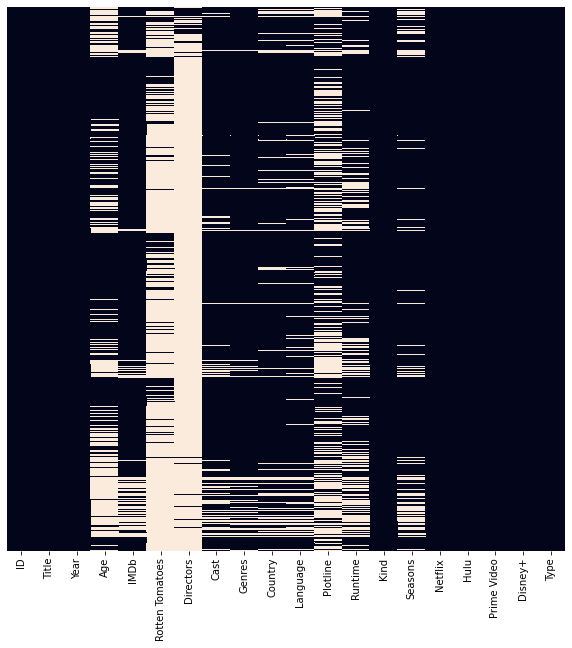

In [8]:
data_investigate(df_tvshows)

In [9]:
# ID
# df_tvshows = df_tvshows.drop(['ID'], axis = 1)
 
# Age
df_tvshows.loc[df_tvshows['Age'].isnull() & df_tvshows['Disney+'] == 1, "Age"] = '13'
# df_tvshows.fillna({'Age' : 18}, inplace = True)
df_tvshows.fillna({'Age' : 'NR'}, inplace = True)
df_tvshows['Age'].replace({'all': '0'}, inplace = True)
df_tvshows['Age'].replace({'7+': '7'}, inplace = True)
df_tvshows['Age'].replace({'13+': '13'}, inplace = True)
df_tvshows['Age'].replace({'16+': '16'}, inplace = True)
df_tvshows['Age'].replace({'18+': '18'}, inplace = True)
# df_tvshows['Age'] = df_tvshows['Age'].astype(int)
 
# IMDb
# df_tvshows.fillna({'IMDb' : df_tvshows['IMDb'].mean()}, inplace = True)
# df_tvshows.fillna({'IMDb' : df_tvshows['IMDb'].median()}, inplace = True)
df_tvshows.fillna({'IMDb' : "NA"}, inplace = True)
 
# Rotten Tomatoes
df_tvshows['Rotten Tomatoes'] = df_tvshows['Rotten Tomatoes'][df_tvshows['Rotten Tomatoes'].notnull()].str.replace('%', '').astype(int)
# df_tvshows['Rotten Tomatoes'] = df_tvshows['Rotten Tomatoes'][df_tvshows['Rotten Tomatoes'].notnull()].astype(int)
# df_tvshows.fillna({'Rotten Tomatoes' : df_tvshows['Rotten Tomatoes'].mean()}, inplace = True)
# df_tvshows.fillna({'Rotten Tomatoes' : df_tvshows['Rotten Tomatoes'].median()}, inplace = True)
# df_tvshows['Rotten Tomatoes'] = df_tvshows['Rotten Tomatoes'].astype(int)
df_tvshows.fillna({'Rotten Tomatoes' : "NA"}, inplace = True)
 
# Directors
# df_tvshows = df_tvshows.drop(['Directors'], axis = 1)
df_tvshows.fillna({'Directors' : "NA"}, inplace = True)
 
# Cast
df_tvshows.fillna({'Cast' : "NA"}, inplace = True)
 
# Genres
df_tvshows.fillna({'Genres': "NA"}, inplace = True)
 
# Country
df_tvshows.fillna({'Country': "NA"}, inplace = True)
 
# Language
df_tvshows.fillna({'Language': "NA"}, inplace = True)
 
# Plotline
df_tvshows.fillna({'Plotline': "NA"}, inplace = True)
 
# Runtime
# df_tvshows.fillna({'Runtime' : df_tvshows['Runtime'].mean()}, inplace = True)
# df_tvshows['Runtime'] = df_tvshows['Runtime'].astype(int)
df_tvshows.fillna({'Runtime' : "NA"}, inplace = True)
 
# Kind
# df_tvshows.fillna({'Kind': "NA"}, inplace = True)
 
# Type
# df_tvshows.fillna({'Type': "NA"}, inplace = True)
# df_tvshows = df_tvshows.drop(['Type'], axis = 1)
 
# Seasons
# df_tvshows.fillna({'Seasons': 1}, inplace = True)
df_tvshows.fillna({'Seasons': "NA"}, inplace = True)
# df_tvshows = df_tvshows.drop(['Seasons'], axis = 1)
# df_tvshows['Seasons'] = df_tvshows['Seasons'].astype(int)
# df_tvshows.fillna({'Seasons' : df_tvshows['Seasons'].mean()}, inplace = True)
# df_tvshows['Seasons'] = df_tvshows['Seasons'].astype(int)
 
# Service Provider
df_tvshows['Service Provider'] = df_tvshows.loc[:, ['Netflix', 'Prime Video', 'Disney+', 'Hulu']].idxmax(axis = 1)
# df_tvshows.drop(['Netflix','Prime Video','Disney+','Hulu'], axis = 1)

# Removing Duplicate and Missing Entries
df_tvshows.dropna(how = 'any', inplace = True)
df_tvshows.drop_duplicates(inplace = True)

No of Rows :  5432
No of Coloums :  21
**************************************************
Colums Names : 
 Index(['ID', 'Title', 'Year', 'Age', 'IMDb', 'Rotten Tomatoes', 'Directors',
       'Cast', 'Genres', 'Country', 'Language', 'Plotline', 'Runtime', 'Kind',
       'Seasons', 'Netflix', 'Hulu', 'Prime Video', 'Disney+', 'Type',
       'Service Provider'],
      dtype='object')
**************************************************
Datatype of Columns : 
 ID                   int64
Title               object
Year                 int64
Age                 object
IMDb                object
Rotten Tomatoes     object
Directors           object
Cast                object
Genres              object
Country             object
Language            object
Plotline            object
Runtime             object
Kind                object
Seasons             object
Netflix              int64
Hulu                 int64
Prime Video          int64
Disney+              int64
Type                 int64
S

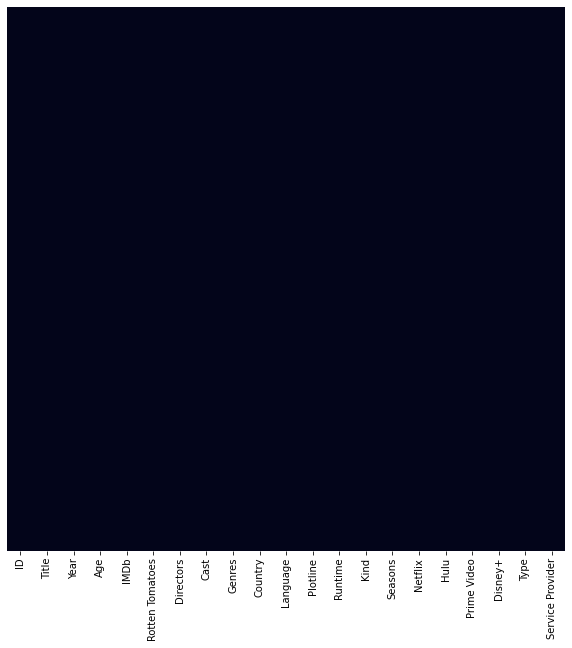

In [10]:
data_investigate(df_tvshows)

In [11]:
df_tvshows.head()

ID                Title  Year Age IMDb Rotten Tomatoes Directors  \
0   1          Snowpiercer  2013  18  6.9              94        NA   
1   2         Philadelphia  1993  13  8.8              80        NA   
2   3                 Roma  2018  18  8.7              93        NA   
3   4                  Amy  2015  18    7              87        NA   
4   5  The Young Offenders  2016  NR    8             100        NA   

                                                Cast  \
0  Daveed Diggs,Iddo Goldberg,Mickey Sumner,Aliso...   
1  Charlie Day,Glenn Howerton,Rob McElhenney,Kait...   
2  Kevin McKidd,Ray Stevenson,Polly Walker,Kerry ...   
3  Amy Brenneman,Richard T. Jones,Jessica Tuck,Ma...   
4  Alex Murphy,Chris Walley,Hilary Rose,Dominic M...   

                             Genres                       Country  ...  \
0      Action,Drama,Sci-Fi,Thriller                 United States  ...   
1                            Comedy                 United States  ...   
2  Action,Drama,History,Romance,War  United Kingdom,United States  ...   
3                             Drama                 United States  ...   
4                            Comedy        United Kingdom,Ireland  ...   

                                            Plotline Runtime       Kind  \
0  Set seven years after the world has become a f...      60  tv series   
1  The gang, 5 raging alcoholic, narcissists run ...      22  tv series   
2  In this British historical drama, the turbulen...      52  tv series   
3  A family drama focused on three generations of...      60  tv series   
4                                                 NA      30  tv series   

  Seasons Netflix  Hulu  Prime Video  Disney+  Type  Service Provider  
0       3       1     0            0        0     1           Netflix  
1      18       1     0            0        0     1           Netflix  
2       2       1     0            0        0     1           Netflix  
3       6       1     0            1        1     1           Netflix  
4       3       1     0            0        0     1           Netflix  

[5 rows x 21 columns]

In [12]:
df_tvshows.describe()

ID         Year      Netflix         Hulu  Prime Video  \
count  5432.000000  5432.000000  5432.000000  5432.000000  5432.000000   
mean   2716.500000  2010.668446     0.341311     0.293999     0.403351   
std    1568.227662    11.726176     0.474193     0.455633     0.490615   
min       1.000000  1901.000000     0.000000     0.000000     0.000000   
25%    1358.750000  2009.000000     0.000000     0.000000     0.000000   
50%    2716.500000  2014.000000     0.000000     0.000000     0.000000   
75%    4074.250000  2017.000000     1.000000     1.000000     1.000000   
max    5432.000000  2020.000000     1.000000     1.000000     1.000000   

           Disney+    Type  
count  5432.000000  5432.0  
mean      0.033689     1.0  
std       0.180445     0.0  
min       0.000000     1.0  
25%       0.000000     1.0  
50%       0.000000     1.0  
75%       0.000000     1.0  
max       1.000000     1.0

In [13]:
df_tvshows.corr()

ID      Year   Netflix      Hulu  Prime Video   Disney+  \
ID           1.000000 -0.031346 -0.646330  0.034293     0.441264  0.195409   
Year        -0.031346  1.000000  0.222316 -0.065807    -0.198675 -0.022741   
Netflix     -0.646330  0.222316  1.000000 -0.366515    -0.515086 -0.119344   
Hulu         0.034293 -0.065807 -0.366515  1.000000    -0.377374 -0.075701   
Prime Video  0.441264 -0.198675 -0.515086 -0.377374     1.000000 -0.151442   
Disney+      0.195409 -0.022741 -0.119344 -0.075701    -0.151442  1.000000   
Type              NaN       NaN       NaN       NaN          NaN       NaN   

             Type  
ID            NaN  
Year          NaN  
Netflix       NaN  
Hulu          NaN  
Prime Video   NaN  
Disney+       NaN  
Type          NaN

In [14]:
# df_tvshows.sort_values('Year', ascending = True)
# df_tvshows.sort_values('IMDb', ascending = False)

In [15]:
# df_tvshows.to_csv(path_or_buf= '/content/drive/MyDrive/Files/updated_otttvshows.csv', index = False)
 
# path = '/content/drive/MyDrive/Files/'
 
# udf_tvshows = pd.read_csv(path + 'updated_otttvshows.csv')
 
# udf_tvshows

In [16]:
# df_netflix_tvshows = df_tvshows.loc[(df_tvshows['Netflix'] > 0)]
# df_hulu_tvshows = df_tvshows.loc[(df_tvshows['Hulu'] > 0)]
# df_prime_video_tvshows = df_tvshows.loc[(df_tvshows['Prime Video'] > 0)]
# df_disney_tvshows = df_tvshows.loc[(df_tvshows['Disney+'] > 0)]

In [17]:
df_netflix_only_tvshows = df_tvshows[(df_tvshows['Netflix'] == 1) & (df_tvshows['Hulu'] == 0) & (df_tvshows['Prime Video'] == 0 ) & (df_tvshows['Disney+'] == 0)]
df_hulu_only_tvshows = df_tvshows[(df_tvshows['Netflix'] == 0) & (df_tvshows['Hulu'] == 1) & (df_tvshows['Prime Video'] == 0 ) & (df_tvshows['Disney+'] == 0)]
df_prime_video_only_tvshows = df_tvshows[(df_tvshows['Netflix'] == 0) & (df_tvshows['Hulu'] == 0) & (df_tvshows['Prime Video'] == 1 ) & (df_tvshows['Disney+'] == 0)]
df_disney_only_tvshows = df_tvshows[(df_tvshows['Netflix'] == 0) & (df_tvshows['Hulu'] == 0) & (df_tvshows['Prime Video'] == 0 ) & (df_tvshows['Disney+'] == 1)]

In [18]:
df_tvshows_countries = df_tvshows.copy()

In [19]:
df_tvshows_countries.drop(df_tvshows_countries.loc[df_tvshows_countries['Country'] == "NA"].index, inplace = True)
# df_tvshows_countries = df_tvshows_countries[df_tvshows_countries.Country != "NA"]
# df_tvshows_countries['Country'] = df_tvshows_countries['Country'].astype(str)

In [20]:
df_tvshows_count_countries = df_tvshows_countries.copy()

In [21]:
df_tvshows_country = df_tvshows_countries.copy()

In [22]:
# Create countries dict where key=name and value = number of countries
 
countries = {}
 
for i in df_tvshows_count_countries['Country'].dropna():
    if i != "NA":
        #print(i,len(i.split(',')))
        countries[i] = len(i.split(','))
    else:
        countries[i] = 0
    
# Add this information to our dataframe as a new column
 
df_tvshows_count_countries['Number of Countries'] = df_tvshows_count_countries['Country'].map(countries).astype(int)

In [23]:
df_tvshows_mixed_countries = df_tvshows_count_countries.copy()

In [24]:
# Creating distinct dataframes only with the tvshows present on individual streaming platforms
netflix_countries_tvshows = df_tvshows_count_countries.loc[df_tvshows_count_countries['Netflix'] == 1]
hulu_countries_tvshows = df_tvshows_count_countries.loc[df_tvshows_count_countries['Hulu'] == 1]
prime_video_countries_tvshows = df_tvshows_count_countries.loc[df_tvshows_count_countries['Prime Video'] == 1]
disney_countries_tvshows = df_tvshows_count_countries.loc[df_tvshows_count_countries['Disney+'] == 1]

<Figure size 720x720 with 0 Axes>

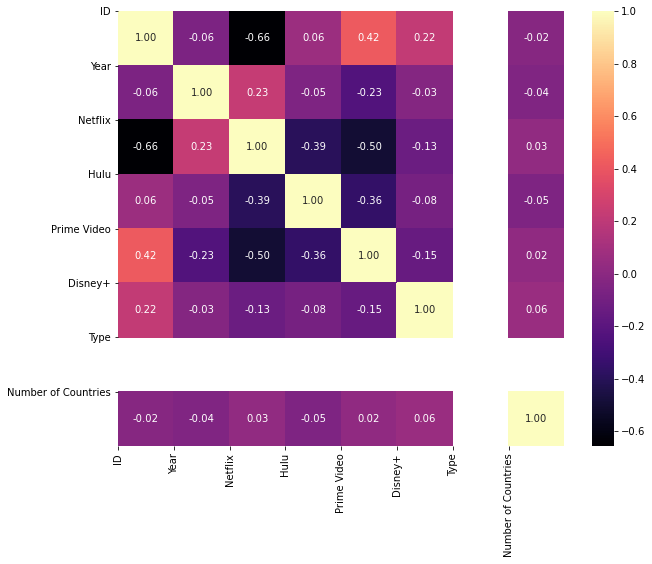

In [25]:
plt.figure(figsize = (10, 10))
corr = df_tvshows_count_countries.corr()
# Plot figsize
fig, ax = plt.subplots(figsize=(10, 8))
# Generate Heat Map, alleast annotations and place floats in map
sns.heatmap(corr, cmap = 'magma', annot = True, fmt = ".2f")
# Apply xticks
plt.xticks(range(len(corr.columns)), corr.columns);
# Apply yticks
plt.yticks(range(len(corr.columns)), corr.columns)
# show plot
plt.show()
fig.show()

In [26]:
df_countries_most_tvshows = df_tvshows_count_countries.sort_values(by = 'Number of Countries', ascending = False).reset_index()
df_countries_most_tvshows = df_countries_most_tvshows.drop(['index'], axis = 1)
# filter = (df_tvshows_count_countries['Number of Countries'] == (df_tvshows_count_countries['Number of Countries'].max()))
# df_countries_most_tvshows = df_tvshows_count_countries[filter]
 
# mostest_rated_tvshows = df_tvshows_count_countries.loc[df_tvshows_count_countries['Number of Countries'].idxmax()]
 
print('\nTV Shows with Highest Ever Number of Countries are : \n')
df_countries_most_tvshows.head(5)


TV Shows with Highest Ever Number of Countries are : 



ID                     Title  Year Age IMDb Rotten Tomatoes Directors  \
0  5371                   Bonkers  1993   7  6.8              NA        NA   
1  3833                   Trapped  2015  16  8.1              NA        NA   
2  1401  Oggy and the Cockroaches  1998   7  7.3              NA        NA   
3   345                  Scarlett  2016  13  6.5              NA        NA   
4  2073     YooHoo & Friends (US)  2012   0  6.2              NA        NA   

                                                Cast  \
0  Jim Cummings,Earl Boen,Frank Welker,Jeff Benne...   
1  Ólafur Darri Ólafsson,Ilmur Kristjánsdóttir,In...   
2                        Hugues Le Bars,Michel Elias   
3  Joanne Whalley,Timothy Dalton,Annabeth Gish,Ju...   
4  Sang Hyun Uhm,Jeon Sook Kyung,Lee Won Chan,Sin...   

                                           Genres  \
0  Animation,Action,Adventure,Comedy,Crime,Family   
1                    Crime,Drama,Mystery,Thriller   
2                  Animation,Action,Comedy,Family   
3                                   Drama,Romance   
4                         Animation,Comedy,Family   

                                             Country  ... Runtime       Kind  \
0  United States,Hong Kong,South Korea,France,Can...  ...      30  tv series   
1  Iceland,Denmark,Finland,Sweden,Norway,Germany,...  ...      60  tv series   
2  France,Canada,Philippines,Vietnam,South Korea,...  ...       8  tv series   
3  France,United States,Germany,Italy,United King...  ...     360  tv series   
4  United States,South Korea,China,France,Japan,C...  ...      NA  tv series   

  Seasons Netflix Hulu  Prime Video  Disney+  Type  Service Provider  \
0       1       0    0            0        1     1           Disney+   
1       3       0    0            1        0     1       Prime Video   
2       7       1    0            0        0     1           Netflix   
3       1       0    0            1        0     1       Prime Video   
4       2       1    0            0        0     1           Netflix   

   Number of Countries  
0                   11  
1                    8  
2                    7  
3                    7  
4                    7  

[5 rows x 22 columns]

In [27]:
fig = px.bar(y = df_countries_most_tvshows['Title'][:15],
             x = df_countries_most_tvshows['Number of Countries'][:15], 
             color = df_countries_most_tvshows['Number of Countries'][:15],
             color_continuous_scale = 'Teal_r', 
             labels = { 'y' : 'TV Shows', 'x' : 'Number of Countries'},
             title  = 'TV Shows with Highest Number of Countries : All Platforms')

fig.update_layout(plot_bgcolor = 'white')
fig.show()

In [28]:
df_countries_least_tvshows = df_tvshows_count_countries.sort_values(by = 'Number of Countries', ascending = True).reset_index()
df_countries_least_tvshows = df_countries_least_tvshows.drop(['index'], axis = 1)
# filter = (df_tvshows_count_countries['Number of Countries'] == (df_tvshows_count_countries['Number of Countries'].min()))
# df_countries_least_tvshows = df_tvshows_count_countries[filter]

print('\nTV Shows with Lowest Ever Number of Countries are : \n')
df_countries_least_tvshows.head(5)


TV Shows with Lowest Ever Number of Countries are : 



ID                              Title  Year Age IMDb Rotten Tomatoes  \
0     1                        Snowpiercer  2013  18  6.9              94   
1  3376                                BEM  2019  NR    6              NA   
2  3374  Barefoot Contessa: Back to Basics  2002   0  7.7              NA   
3  3373                            Get Ace  2014   0  7.5              NA   
4  3371             Murder on the Internet  2017  NR  6.8              NA   

  Directors                                               Cast  \
0        NA  Daveed Diggs,Iddo Goldberg,Mickey Sumner,Aliso...   
1        NA  Felecia Angelle,Dani Chambers,Aaron Dismuke,Ja...   
2        NA                                                 NA   
3        NA  Jeffery Richards,David Myles Brown,Lyall Brook...   
4        NA            Emma Kenny,Siobhan McFadyen,Sam Meadows   

                         Genres         Country  ... Runtime       Kind  \
0  Action,Drama,Sci-Fi,Thriller   United States  ...      60  tv series   
1              Animation,Horror           Japan  ...      NA  tv series   
2                    Reality-TV   United States  ...      NA  tv series   
3      Animation,Fantasy,Sci-Fi       Australia  ...      12  tv series   
4             Documentary,Crime  United Kingdom  ...      44  tv series   

  Seasons Netflix Hulu  Prime Video  Disney+  Type  Service Provider  \
0       3       1    0            0        0     1           Netflix   
1       1       0    1            0        0     1              Hulu   
2      10       0    1            0        0     1              Hulu   
3       2       0    1            0        0     1              Hulu   
4       1       0    1            1        0     1       Prime Video   

   Number of Countries  
0                    1  
1                    1  
2                    1  
3                    1  
4                    1  

[5 rows x 22 columns]

In [29]:
fig = px.bar(y = df_countries_least_tvshows['Title'][:15],
             x = df_countries_least_tvshows['Number of Countries'][:15], 
             color = df_countries_least_tvshows['Number of Countries'][:15],
             color_continuous_scale = 'Teal_r', 
             labels = { 'y' : 'TV Shows', 'x' : 'Number of Countries'},
             title  = 'TV Shows with Lowest Number of Countries : All Platforms')

fig.update_layout(plot_bgcolor = 'white')
fig.show()

In [30]:
print(f'''
      Total '{df_tvshows_count_countries['Number of Countries'].unique().shape[0]}' unique Number of Countries s were Given, They were Like this,\n
      
      {df_tvshows_count_countries.sort_values(by = 'Number of Countries', ascending = False)['Number of Countries'].unique()}\n
 
      The Highest Number of Countries Ever Any TV Show Got is '{df_countries_most_tvshows['Title'][0]}' : '{df_countries_most_tvshows['Number of Countries'].max()}'\n
 
      The Lowest Number of Countries Ever Any TV Show Got is '{df_countries_least_tvshows['Title'][0]}' : '{df_countries_least_tvshows['Number of Countries'].min()}'\n
      ''')


      Total '9' unique Number of Countries s were Given, They were Like this,

      
      [11  8  7  6  5  4  3  2  1]

 
      The Highest Number of Countries Ever Any TV Show Got is 'Bonkers' : '11'

 
      The Lowest Number of Countries Ever Any TV Show Got is 'Snowpiercer' : '1'

      


In [31]:
netflix_countries_most_tvshows = df_countries_most_tvshows.loc[df_countries_most_tvshows['Netflix']==1].reset_index()
netflix_countries_most_tvshows = netflix_countries_most_tvshows.drop(['index'], axis = 1)
 
netflix_countries_least_tvshows = df_countries_least_tvshows.loc[df_countries_least_tvshows['Netflix']==1].reset_index()
netflix_countries_least_tvshows = netflix_countries_least_tvshows.drop(['index'], axis = 1)
 
netflix_countries_most_tvshows.head(5)

ID                     Title  Year Age IMDb Rotten Tomatoes  \
0  1401  Oggy and the Cockroaches  1998   7  7.3              NA   
1  2073     YooHoo & Friends (US)  2012   0  6.2              NA   
2    52      Abominable Christmas  2012  NR  5.3              NA   
3  1359      Ultimate Beastmaster  2017   7  7.3              NA   
4   798             Frozen Planet  2011   7    9              NA   

           Directors                                               Cast  \
0                 NA                        Hugues Le Bars,Michel Elias   
1                 NA  Sang Hyun Uhm,Jeon Sook Kyung,Lee Won Chan,Sin...   
2  Chad Van De Keere  Ariel Winter,Drake Bell,Emilio Estevez,Isabell...   
3                 NA  Tiki Barber,Rafinha Bastos,Luis Ernesto Franco...   
4                 NA  David Attenborough,Alec Baldwin,Chadden Hunter...   

                                    Genres  \
0           Animation,Action,Comedy,Family   
1                  Animation,Comedy,Family   
2  Animation,Short,Adventure,Comedy,Family   
3                     Game-Show,Reality-TV   
4                              Documentary   

                                             Country  ... Runtime       Kind  \
0  France,Canada,Philippines,Vietnam,South Korea,...  ...       8  tv series   
1  United States,South Korea,China,France,Japan,C...  ...      NA  tv series   
2  United States,India,Canada,Sri Lanka,South Afr...  ...      43  tv series   
3  United States,Brazil,South Korea,Mexico,Japan,...  ...      55  tv series   
4  United Kingdom,United States,Spain,Germany,Gre...  ...     333  tv series   

  Seasons Netflix Hulu  Prime Video  Disney+  Type  Service Provider  \
0       7       1    0            0        0     1           Netflix   
1       2       1    0            0        0     1           Netflix   
2      NA       1    0            0        0     1           Netflix   
3       3       1    0            0        0     1           Netflix   
4       1       1    0            0        0     1           Netflix   

   Number of Countries  
0                    7  
1                    7  
2                    6  
3                    6  
4                    6  

[5 rows x 22 columns]

In [32]:
fig = px.bar(y = netflix_countries_most_tvshows['Title'][:15],
             x = netflix_countries_most_tvshows['Number of Countries'][:15], 
             color = netflix_countries_most_tvshows['Number of Countries'][:15],
             color_continuous_scale = 'Teal_r', 
             labels = { 'y' : 'TV Shows', 'x' : 'Number of Countries'},
             title  = 'TV Shows with Highest Number of Countries : Netflix')

fig.update_layout(plot_bgcolor = 'white')
fig.show()

In [33]:
fig = px.bar(y = netflix_countries_least_tvshows['Title'][:15],
             x = netflix_countries_least_tvshows['Number of Countries'][:15], 
             color = netflix_countries_least_tvshows['Number of Countries'][:15],
             color_continuous_scale = 'Teal_r', 
             labels = { 'y' : 'TV Shows', 'x' : 'Number of Countries'},
             title  = 'TV Shows with Lowest Number of Countries : Netflix')

fig.update_layout(plot_bgcolor = 'white')
fig.show()

In [34]:
hulu_countries_most_tvshows = df_countries_most_tvshows.loc[df_countries_most_tvshows['Hulu']==1].reset_index()
hulu_countries_most_tvshows = hulu_countries_most_tvshows.drop(['index'], axis = 1)
 
hulu_countries_least_tvshows = df_countries_least_tvshows.loc[df_countries_least_tvshows['Hulu']==1].reset_index()
hulu_countries_least_tvshows = hulu_countries_least_tvshows.drop(['index'], axis = 1)
 
hulu_countries_most_tvshows.head(5)

ID                         Title  Year Age IMDb Rotten Tomatoes  \
0  2465  The Amazing World of Gumball  2011   7  8.2              NA   
1  2275                 Gravity Falls  2012   7  8.9             100   
2  3450                Chloe's Closet  2010   0  6.8              NA   
3  2490   Star vs. the Forces of Evil  2015   7    8              NA   
4  2406               Steven Universe  2013   7  8.2             100   

  Directors                                               Cast  \
0        NA  Dan Russell,Teresa Gallagher,Kerry Shale,Kyla ...   
1        NA  Jason Ritter,Alex Hirsch,Kristen Schaal,Linda ...   
2        NA  Teresa Beausang,Oisín Kearns,Siobhán Ní Thuair...   
3        NA  Eden Sher,Adam McArthur,Grey Griffin,Daron Nef...   
4        NA  Zach Callison,Deedee Magno,Michaela Dietz,Este...   

                                              Genres  \
0          Animation,Adventure,Comedy,Family,Fantasy   
1  Animation,Adventure,Comedy,Drama,Family,Fantas...   
2          Animation,Adventure,Comedy,Family,Fantasy   
3  Animation,Action,Adventure,Comedy,Drama,Family...   
4  Animation,Action,Adventure,Comedy,Drama,Family...   

                                             Country  ... Runtime       Kind  \
0  United Kingdom,Ireland,United States,Germany,J...  ...      11  tv series   
1  United States,Argentina,Australia,United Kingd...  ...      23  tv series   
2  United States,Germany,United Kingdom,Netherlan...  ...      11  tv series   
3    United States,Spain,United Kingdom,Mexico,Japan  ...      22  tv series   
4       United States,South Korea,Spain,Japan,Mexico  ...      11  tv series   

  Seasons Netflix Hulu  Prime Video  Disney+  Type  Service Provider  \
0       6       0    1            0        0     1              Hulu   
1       2       0    1            0        1     1           Disney+   
2       4       0    1            1        0     1       Prime Video   
3       4       0    1            0        1     1           Disney+   
4       6       0    1            0        0     1              Hulu   

   Number of Countries  
0                    6  
1                    6  
2                    6  
3                    5  
4                    5  

[5 rows x 22 columns]

In [35]:
fig = px.bar(y = hulu_countries_most_tvshows['Title'][:15],
             x = hulu_countries_most_tvshows['Number of Countries'][:15], 
             color = hulu_countries_most_tvshows['Number of Countries'][:15],
             color_continuous_scale = 'Teal_r', 
             labels = { 'y' : 'TV Shows', 'x' : 'Number of Countries'},
             title  = 'TV Shows with Highest Number of Countries : Hulu')

fig.update_layout(plot_bgcolor = 'white')
fig.show()

In [36]:
fig = px.bar(y = hulu_countries_least_tvshows['Title'][:15],
             x = hulu_countries_least_tvshows['Number of Countries'][:15], 
             color = hulu_countries_least_tvshows['Number of Countries'][:15],
             color_continuous_scale = 'Teal_r', 
             labels = { 'y' : 'TV Shows', 'x' : 'Number of Countries'},
             title  = 'TV Shows with Lowest Number of Countries : Hulu')

fig.update_layout(plot_bgcolor = 'white')
fig.show()

In [37]:
prime_video_countries_most_tvshows = df_countries_most_tvshows.loc[df_countries_most_tvshows['Prime Video']==1].reset_index()
prime_video_countries_most_tvshows = prime_video_countries_most_tvshows.drop(['index'], axis = 1)
 
prime_video_countries_least_tvshows = df_countries_least_tvshows.loc[df_countries_least_tvshows['Prime Video']==1].reset_index()
prime_video_countries_least_tvshows = prime_video_countries_least_tvshows.drop(['index'], axis = 1)
 
prime_video_countries_most_tvshows.head(5)

ID                             Title  Year Age IMDb Rotten Tomatoes  \
0  3833                           Trapped  2015  16  8.1              NA   
1   345                          Scarlett  2016  13  6.5              NA   
2  3980          Titanic: Blood and Steel  2012  16  7.3              NA   
3  4290                        GetBackers  2002   7  7.4              NA   
4  4046  The Busy World of Richard Scarry  1994   0  7.4              NA   

  Directors                                               Cast  \
0        NA  Ólafur Darri Ólafsson,Ilmur Kristjánsdóttir,In...   
1        NA  Joanne Whalley,Timothy Dalton,Annabeth Gish,Ju...   
2        NA  Kevin Zegers,Alessandra Mastronardi,Derek Jaco...   
3        NA  Darren Pleavin,Shanon Weaver,Jason Liebrecht,O...   
4        NA  Peter Wildman,Denis Akiyama,Carl Banas,George ...   

                                              Genres  \
0                       Crime,Drama,Mystery,Thriller   
1                                      Drama,Romance   
2                                      Drama,History   
3  Animation,Action,Adventure,Comedy,Crime,Drama,...   
4                                   Animation,Family   

                                             Country  ... Runtime       Kind  \
0  Iceland,Denmark,Finland,Sweden,Norway,Germany,...  ...      60  tv series   
1  France,United States,Germany,Italy,United King...  ...     360  tv series   
2  Ireland,Italy,France,Canada,United Kingdom,Spa...  ...      55  tv series   
3  Japan,Italy,United Kingdom,Mexico,United State...  ...      24  tv series   
4  Canada,France,Italy,United States,United Kingd...  ...      30  tv series   

  Seasons Netflix Hulu  Prime Video  Disney+  Type  Service Provider  \
0       3       0    0            1        0     1       Prime Video   
1       1       0    0            1        0     1       Prime Video   
2       1       0    0            1        0     1       Prime Video   
3       1       0    0            1        0     1       Prime Video   
4       5       0    0            1        0     1       Prime Video   

   Number of Countries  
0                    8  
1                    7  
2                    7  
3                    6  
4                    6  

[5 rows x 22 columns]

In [38]:
fig = px.bar(y = prime_video_countries_most_tvshows['Title'][:15],
             x = prime_video_countries_most_tvshows['Number of Countries'][:15], 
             color = prime_video_countries_most_tvshows['Number of Countries'][:15],
             color_continuous_scale = 'Teal_r', 
             labels = { 'y' : 'TV Shows', 'x' : 'Number of Countries'},
             title  = 'TV Shows with Highest Number of Countries : Prime Video')

fig.update_layout(plot_bgcolor = 'white')
fig.show()

In [39]:
fig = px.bar(y = prime_video_countries_least_tvshows['Title'][:15],
             x = prime_video_countries_least_tvshows['Number of Countries'][:15], 
             color = prime_video_countries_least_tvshows['Number of Countries'][:15],
             color_continuous_scale = 'Teal_r', 
             labels = { 'y' : 'TV Shows', 'x' : 'Number of Countries'},
             title  = 'TV Shows with Lowest Number of Countries : Prime Video')

fig.update_layout(plot_bgcolor = 'white')
fig.show()

In [40]:
disney_countries_most_tvshows = df_countries_most_tvshows.loc[df_countries_most_tvshows['Disney+']==1].reset_index()
disney_countries_most_tvshows = disney_countries_most_tvshows.drop(['index'], axis = 1)
 
disney_countries_least_tvshows = df_countries_least_tvshows.loc[df_countries_least_tvshows['Disney+']==1].reset_index()
disney_countries_least_tvshows = disney_countries_least_tvshows.drop(['index'], axis = 1)
 
disney_countries_most_tvshows.head(5)

ID                         Title  Year Age IMDb Rotten Tomatoes  \
0  5371                       Bonkers  1993   7  6.8              NA   
1  2275                 Gravity Falls  2012   7  8.9             100   
2  2490   Star vs. the Forces of Evil  2015   7    8              NA   
3  5356  Iron Man: Armored Adventures  2009   7  6.5              60   
4  3350           Henry Hugglemonster  2013   0  5.2              NA   

  Directors                                               Cast  \
0        NA  Jim Cummings,Earl Boen,Frank Welker,Jeff Benne...   
1        NA  Jason Ritter,Alex Hirsch,Kristen Schaal,Linda ...   
2        NA  Eden Sher,Adam McArthur,Grey Griffin,Daron Nef...   
3        NA  Adrian Petriw,Daniel Bacon,Anna Cummer,Lisa An...   
4        NA  Lara Jill Miller,Hynden Walch,Tom Kenny,Kari W...   

                                              Genres  \
0     Animation,Action,Adventure,Comedy,Crime,Family   
1  Animation,Adventure,Comedy,Drama,Family,Fantas...   
2  Animation,Action,Adventure,Comedy,Drama,Family...   
3   Animation,Action,Adventure,Family,Fantasy,Sci-Fi   
4           Animation,Adventure,Family,Fantasy,Music   

                                             Country  ... Runtime       Kind  \
0  United States,Hong Kong,South Korea,France,Can...  ...      30  tv series   
1  United States,Argentina,Australia,United Kingd...  ...      23  tv series   
2    United States,Spain,United Kingdom,Mexico,Japan  ...      22  tv series   
3  Canada,United States,United Kingdom,France,Lux...  ...      22  tv series   
4  Ireland,United Kingdom,United States,South Kor...  ...      22  tv series   

  Seasons Netflix Hulu  Prime Video  Disney+  Type  Service Provider  \
0       1       0    0            0        1     1           Disney+   
1       2       0    1            0        1     1           Disney+   
2       4       0    1            0        1     1           Disney+   
3       2       0    0            0        1     1           Disney+   
4       2       0    1            0        1     1           Disney+   

   Number of Countries  
0                   11  
1                    6  
2                    5  
3                    5  
4                    5  

[5 rows x 22 columns]

In [41]:
fig = px.bar(y = disney_countries_most_tvshows['Title'][:15],
             x = disney_countries_most_tvshows['Number of Countries'][:15], 
             color = disney_countries_most_tvshows['Number of Countries'][:15],
             color_continuous_scale = 'Teal_r', 
             labels = { 'y' : 'TV Shows', 'x' : 'Number of Countries'},
             title  = 'TV Shows with Highest Number of Countries : Disney+')

fig.update_layout(plot_bgcolor = 'white')
fig.show()

In [42]:
fig = px.bar(y = disney_countries_least_tvshows['Title'][:15],
             x = disney_countries_least_tvshows['Number of Countries'][:15], 
             color = disney_countries_least_tvshows['Number of Countries'][:15],
             color_continuous_scale = 'Teal_r', 
             labels = { 'y' : 'TV Shows', 'x' : 'Number of Countries'},
             title  = 'TV Shows with Lowest Number of Countries : Disney+')

fig.update_layout(plot_bgcolor = 'white')
fig.show()

In [43]:
print(f'''
      The TV Show with Highest Number of Countries Ever Got is '{df_countries_most_tvshows['Title'][0]}' : '{df_countries_most_tvshows['Number of Countries'].max()}'\n
      The TV Show with Lowest Number of Countries Ever Got is '{df_countries_least_tvshows['Title'][0]}' : '{df_countries_least_tvshows['Number of Countries'].min()}'\n
      
      The TV Show with Highest Number of Countries on 'Netflix' is '{netflix_countries_most_tvshows['Title'][0]}' : '{netflix_countries_most_tvshows['Number of Countries'].max()}'\n
      The TV Show with Lowest Number of Countries on 'Netflix' is '{netflix_countries_least_tvshows['Title'][0]}' : '{netflix_countries_least_tvshows['Number of Countries'].min()}'\n
      
      The TV Show with Highest Number of Countries on 'Hulu' is '{hulu_countries_most_tvshows['Title'][0]}' : '{hulu_countries_most_tvshows['Number of Countries'].max()}'\n
      The TV Show with Lowest Number of Countries on 'Hulu' is '{hulu_countries_least_tvshows['Title'][0]}' : '{hulu_countries_least_tvshows['Number of Countries'].min()}'\n
      
      The TV Show with Highest Number of Countries on 'Prime Video' is '{prime_video_countries_most_tvshows['Title'][0]}' : '{prime_video_countries_most_tvshows['Number of Countries'].max()}'\n
      The TV Show with Lowest Number of Countries on 'Prime Video' is '{prime_video_countries_least_tvshows['Title'][0]}' : '{prime_video_countries_least_tvshows['Number of Countries'].min()}'\n
      
      The TV Show with Highest Number of Countries on 'Disney+' is '{disney_countries_most_tvshows['Title'][0]}' : '{disney_countries_most_tvshows['Number of Countries'].max()}'\n
      The TV Show with Lowest Number of Countries on 'Disney+' is '{disney_countries_least_tvshows['Title'][0]}' : '{disney_countries_least_tvshows['Number of Countries'].min()}'\n 
      ''')


      The TV Show with Highest Number of Countries Ever Got is 'Bonkers' : '11'

      The TV Show with Lowest Number of Countries Ever Got is 'Snowpiercer' : '1'

      
      The TV Show with Highest Number of Countries on 'Netflix' is 'Oggy and the Cockroaches' : '7'

      The TV Show with Lowest Number of Countries on 'Netflix' is 'Snowpiercer' : '1'

      
      The TV Show with Highest Number of Countries on 'Hulu' is 'The Amazing World of Gumball' : '6'

      The TV Show with Lowest Number of Countries on 'Hulu' is 'BEM' : '1'

      
      The TV Show with Highest Number of Countries on 'Prime Video' is 'Trapped' : '8'

      The TV Show with Lowest Number of Countries on 'Prime Video' is 'Murder on the Internet' : '1'

      
      The TV Show with Highest Number of Countries on 'Disney+' is 'Bonkers' : '11'

      The TV Show with Lowest Number of Countries on 'Disney+' is 'Lost Treasures of Egypt' : '1'
 
      


In [44]:
print(f'''
      Accross All Platforms the Average Number of Countries is '{round(df_tvshows_count_countries['Number of Countries'].mean(), ndigits = 2)}'\n
      The Average Number of Countries on 'Netflix' is '{round(netflix_countries_tvshows['Number of Countries'].mean(), ndigits = 2)}'\n
      The Average Number of Countries on 'Hulu' is '{round(hulu_countries_tvshows['Number of Countries'].mean(), ndigits = 2)}'\n
      The Average Number of Countries on 'Prime Video' is '{round(prime_video_countries_tvshows['Number of Countries'].mean(), ndigits = 2)}'\n
      The Average Number of Countries on 'Disney+' is '{round(disney_countries_tvshows['Number of Countries'].mean(), ndigits = 2)}'\n 
      ''')


      Accross All Platforms the Average Number of Countries is '1.15'

      The Average Number of Countries on 'Netflix' is '1.17'

      The Average Number of Countries on 'Hulu' is '1.11'

      The Average Number of Countries on 'Prime Video' is '1.16'

      The Average Number of Countries on 'Disney+' is '1.32'
 
      


In [45]:
print(f'''
      Accross All Platforms Total Count of Country is '{df_tvshows_count_countries['Number of Countries'].max()}'\n
      Total Count of Country on 'Netflix' is '{netflix_countries_tvshows['Number of Countries'].max()}'\n
      Total Count of Country on 'Hulu' is '{hulu_countries_tvshows['Number of Countries'].max()}'\n
      Total Count of Country on 'Prime Video' is '{prime_video_countries_tvshows['Number of Countries'].max()}'\n
      Total Count of Country on 'Disney+' is '{disney_countries_tvshows['Number of Countries'].max()}'\n 
      ''')


      Accross All Platforms Total Count of Country is '11'

      Total Count of Country on 'Netflix' is '7'

      Total Count of Country on 'Hulu' is '6'

      Total Count of Country on 'Prime Video' is '8'

      Total Count of Country on 'Disney+' is '11'
 
      


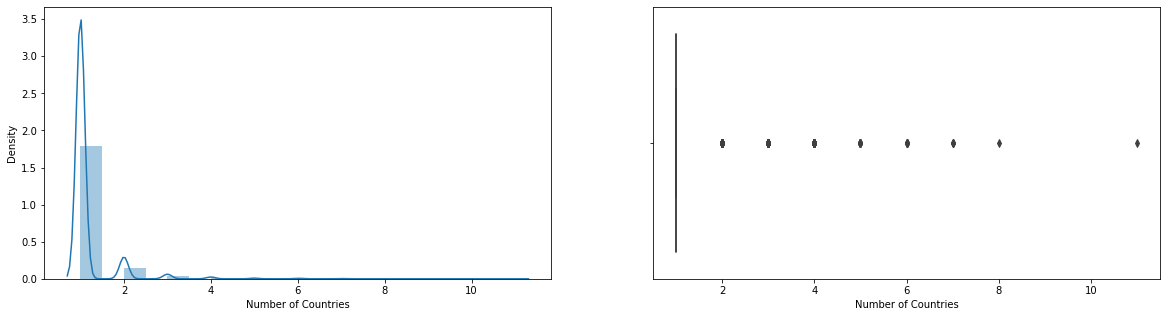

In [46]:
f, ax = plt.subplots(1, 2 , figsize = (20, 5))
sns.distplot(df_tvshows_count_countries['Number of Countries'],bins = 20, kde = True, ax = ax[0])
sns.boxplot(df_tvshows_count_countries['Number of Countries'], ax = ax[1])
plt.show()

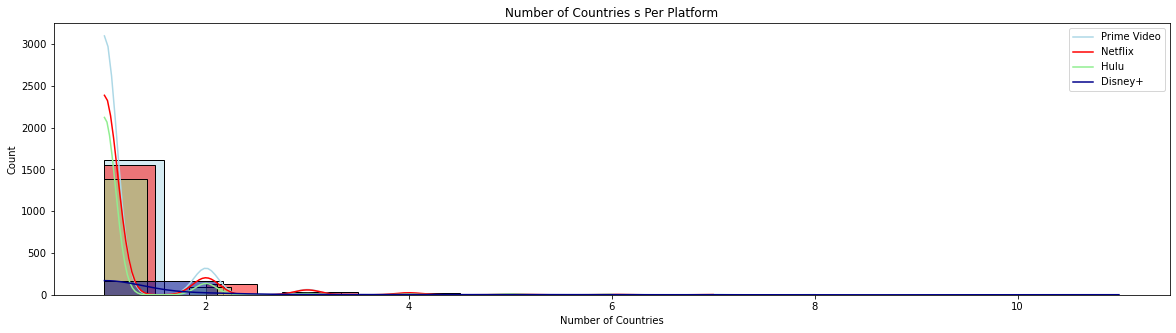

In [47]:
# Defining plot size and title
plt.figure(figsize = (20, 5))
plt.title('Number of Countries s Per Platform')
 
# Plotting the information from each dataset into a histogram
sns.histplot(prime_video_countries_tvshows['Number of Countries'], color = 'lightblue', legend = True, kde = True)
sns.histplot(netflix_countries_tvshows['Number of Countries'], color = 'red', legend = True, kde = True)
sns.histplot(hulu_countries_tvshows['Number of Countries'], color = 'lightgreen', legend = True, kde = True)
sns.histplot(disney_countries_tvshows['Number of Countries'], color = 'darkblue', legend = True, kde = True) 
 
# Setting the legend
plt.legend(['Prime Video', 'Netflix', 'Hulu', 'Disney+'])
plt.show()

In [48]:
df_lan = df_tvshows_country['Country'].str.split(',').apply(pd.Series).stack()
del df_tvshows_country['Country']
df_lan.index = df_lan.index.droplevel(-1)
df_lan.name = 'Country'
df_tvshows_country = df_tvshows_country.join(df_lan)
df_tvshows_country.drop_duplicates(inplace = True)

In [49]:
df_tvshows_country.head(5)

ID         Title  Year Age IMDb Rotten Tomatoes Directors  \
0   1   Snowpiercer  2013  18  6.9              94        NA   
1   2  Philadelphia  1993  13  8.8              80        NA   
2   3          Roma  2018  18  8.7              93        NA   
2   3          Roma  2018  18  8.7              93        NA   
3   4           Amy  2015  18    7              87        NA   

                                                Cast  \
0  Daveed Diggs,Iddo Goldberg,Mickey Sumner,Aliso...   
1  Charlie Day,Glenn Howerton,Rob McElhenney,Kait...   
2  Kevin McKidd,Ray Stevenson,Polly Walker,Kerry ...   
2  Kevin McKidd,Ray Stevenson,Polly Walker,Kerry ...   
3  Amy Brenneman,Richard T. Jones,Jessica Tuck,Ma...   

                             Genres Language  ... Runtime       Kind Seasons  \
0      Action,Drama,Sci-Fi,Thriller  English  ...      60  tv series       3   
1                            Comedy  English  ...      22  tv series      18   
2  Action,Drama,History,Romance,War  English  ...      52  tv series       2   
2  Action,Drama,History,Romance,War  English  ...      52  tv series       2   
3                             Drama  English  ...      60  tv series       6   

  Netflix  Hulu  Prime Video  Disney+  Type  Service Provider         Country  
0       1     0            0        0     1           Netflix   United States  
1       1     0            0        0     1           Netflix   United States  
2       1     0            0        0     1           Netflix  United Kingdom  
2       1     0            0        0     1           Netflix   United States  
3       1     0            1        1     1           Netflix   United States  

[5 rows x 21 columns]

In [50]:
country_count = df_tvshows_country.groupby('Country')['Title'].count()
country_tvshows = df_tvshows_country.groupby('Country')[['Netflix', 'Hulu', 'Prime Video', 'Disney+']].sum()
country_data_tvshows = pd.concat([country_count, country_tvshows], axis = 1).reset_index().rename(columns = {'Title' : 'TV Shows Count'})
country_data_tvshows = country_data_tvshows.sort_values(by = 'TV Shows Count', ascending = False)

In [51]:
# Creating distinct dataframes only with the tvshows present on individual streaming platforms
netflix_country_tvshows = country_data_tvshows[country_data_tvshows['Netflix'] !=  0].sort_values(by = 'Netflix', ascending = False).reset_index()
netflix_country_tvshows = netflix_country_tvshows.drop(['index', 'Hulu', 'Prime Video', 'Disney+', 'TV Shows Count'], axis = 1)

hulu_country_tvshows = country_data_tvshows[country_data_tvshows['Hulu'] !=  0].sort_values(by = 'Hulu', ascending = False).reset_index()
hulu_country_tvshows = hulu_country_tvshows.drop(['index', 'Netflix', 'Prime Video', 'Disney+', 'TV Shows Count'], axis = 1)

prime_video_country_tvshows = country_data_tvshows[country_data_tvshows['Prime Video'] !=  0].sort_values(by = 'Prime Video', ascending = False).reset_index()
prime_video_country_tvshows = prime_video_country_tvshows.drop(['index', 'Netflix', 'Hulu', 'Disney+', 'TV Shows Count'], axis = 1)

disney_country_tvshows = country_data_tvshows[country_data_tvshows['Disney+'] !=  0].sort_values(by = 'Disney+', ascending = False).reset_index()
disney_country_tvshows = disney_country_tvshows.drop(['index', 'Netflix', 'Hulu', 'Prime Video', 'TV Shows Count'], axis = 1)

In [52]:
# Country with TV Shows Counts - All Platforms Combined
country_data_tvshows.sort_values(by = 'TV Shows Count', ascending = False)[:10]

Country  TV Shows Count  Netflix  Hulu  Prime Video  Disney+
69   United States            2705      729  1025          995      164
68  United Kingdom             771      284   145          385       13
32           Japan             411      147   231           94        3
8           Canada             378      139    77          182       10
57     South Korea             166      111    22           44        7
1        Australia             144       69    32           53        2
19          France             138       69    20           57        6
59           Spain              76       50     9           22        2
41          Mexico              75       49    15           12        2
20         Germany              71       32     7           32        1

In [53]:
fig = px.bar(x = country_data_tvshows['Country'][:50],
             y = country_data_tvshows['TV Shows Count'][:50], 
             color = country_data_tvshows['TV Shows Count'][:50],
             color_continuous_scale = 'Teal_r', 
             labels = { 'x' : 'Country', 'y' : 'TV Shows Count'},
             title  = 'Major Countries : All Platforms')

fig.update_layout(plot_bgcolor = 'white')
fig.show()

In [54]:
fig = px.choropleth(data_frame = country_data_tvshows, locations = 'Country', locationmode = 'country names', color = 'TV Shows Count', color_continuous_scale = 'deep')

fig.show()

In [55]:
df_country_high_tvshows = country_data_tvshows.sort_values(by = 'TV Shows Count', ascending = False).reset_index()
df_country_high_tvshows = df_country_high_tvshows.drop(['index'], axis = 1)
# filter = (country_data_tvshows['TV Shows Count'] == (country_data_tvshows['TV Shows Count'].max()))
# df_country_high_tvshows = country_data_tvshows[filter]
 
# highest_rated_tvshows = country_data_tvshows.loc[country_data_tvshows['TV Shows Count'].idxmax()]
 
print('\nCountry with Highest Ever TV Shows Count are : All Platforms Combined\n')
df_country_high_tvshows.head(5)


Country with Highest Ever TV Shows Count are : All Platforms Combined



Country  TV Shows Count  Netflix  Hulu  Prime Video  Disney+
0   United States            2705      729  1025          995      164
1  United Kingdom             771      284   145          385       13
2           Japan             411      147   231           94        3
3          Canada             378      139    77          182       10
4     South Korea             166      111    22           44        7

In [56]:
fig = px.bar(y = df_country_high_tvshows['Country'][:15],
             x = df_country_high_tvshows['TV Shows Count'][:15], 
             color = df_country_high_tvshows['TV Shows Count'][:15],
             color_continuous_scale = 'Teal_r', 
             labels = { 'y' : 'Country', 'x' : 'TV Shows Count'},
             title  = 'Country with Highest TV Shows : All Platforms')

fig.update_layout(plot_bgcolor = 'white')
fig.show()

In [57]:
df_country_low_tvshows = country_data_tvshows.sort_values(by = 'TV Shows Count', ascending = True).reset_index()
df_country_low_tvshows = df_country_low_tvshows.drop(['index'], axis = 1)
# filter = (country_data_tvshows['TV Shows Count'] == (country_data_tvshows['TV Shows Count'].min()))
# df_country_low_tvshows = country_data_tvshows[filter]

print('\nCountry with Lowest Ever TV Shows Count are : All Platforms Combined\n')
df_country_low_tvshows.head(5)


Country with Lowest Ever TV Shows Count are : All Platforms Combined



Country  TV Shows Count  Netflix  Hulu  Prime Video  Disney+
0  Lithuania               1        0     0            1        0
1     Serbia               1        0     0            1        0
2      Korea               1        1     0            0        0
3    Vietnam               1        1     0            0        0
4  Venezuela               1        0     1            0        0

In [58]:
fig = px.bar(y = df_country_low_tvshows['Country'][:15],
             x = df_country_low_tvshows['TV Shows Count'][:15], 
             color = df_country_low_tvshows['TV Shows Count'][:15],
             color_continuous_scale = 'Teal_r', 
             labels = { 'y' : 'Country', 'x' : 'TV Shows Count'},
             title  = 'Country with Lowest TV Shows Count : All Platforms')

fig.update_layout(plot_bgcolor = 'white')
fig.show()

In [59]:
print(f'''
      Total '{country_data_tvshows['Country'].unique().shape[0]}' unique Country Count s were Given, They were Like this,\n
      
      {country_data_tvshows.sort_values(by = 'TV Shows Count', ascending = False)['Country'].unique()[:5]}\n
 
      The Highest Ever TV Shows Count Ever Any TV Show Got is '{df_country_high_tvshows['Country'][0]}' : '{df_country_high_tvshows['TV Shows Count'].max()}'\n
 
      The Lowest Ever TV Shows Count Ever Any TV Show Got is '{df_country_low_tvshows['Country'][0]}' : '{df_country_low_tvshows['TV Shows Count'].min()}'\n
      ''')


      Total '74' unique Country Count s were Given, They were Like this,

      
      ['United States' 'United Kingdom' 'Japan' 'Canada' 'South Korea']

 
      The Highest Ever TV Shows Count Ever Any TV Show Got is 'United States' : '2705'

 
      The Lowest Ever TV Shows Count Ever Any TV Show Got is 'Lithuania' : '1'

      


In [60]:
fig = px.pie(country_data_tvshows[:10], names = 'Country', values = 'TV Shows Count', color_discrete_sequence = px.colors.sequential.Teal)
fig.update_traces(textposition = 'inside', textinfo = 'percent+label', title = 'TV Shows Count based on Country')
fig.show()

In [61]:
# netflix_country_tvshows = country_data_tvshows[country_data_tvshows['Netflix'] !=  0].sort_values(by = 'Netflix', ascending = False).reset_index()
# netflix_country_tvshows = netflix_country_tvshows.drop(['index', 'Hulu', 'Prime Video', 'Disney+', 'TV Shows Count'], axis = 1)
 
netflix_country_high_tvshows = df_country_high_tvshows.sort_values(by = 'Netflix', ascending = False).reset_index()
netflix_country_high_tvshows = netflix_country_high_tvshows.drop(['index'], axis = 1)
 
netflix_country_low_tvshows = df_country_high_tvshows.sort_values(by = 'Netflix', ascending = True).reset_index()
netflix_country_low_tvshows = netflix_country_low_tvshows.drop(['index'], axis = 1)
 
netflix_country_high_tvshows.head(5)

Country  TV Shows Count  Netflix  Hulu  Prime Video  Disney+
0   United States            2705      729  1025          995      164
1  United Kingdom             771      284   145          385       13
2           Japan             411      147   231           94        3
3          Canada             378      139    77          182       10
4     South Korea             166      111    22           44        7

In [62]:
fig = px.bar(x = netflix_country_high_tvshows['Country'][:15],
             y = netflix_country_high_tvshows['Netflix'][:15], 
             color = netflix_country_high_tvshows['Netflix'][:15],
             color_continuous_scale = 'Teal_r', 
             labels = { 'y' : 'Country', 'x' : 'TV Shows Count'},
             title  = 'Country with Highest TV Shows : Netflix')

fig.update_layout(plot_bgcolor = 'white')
fig.show()

In [63]:
fig = px.choropleth(data_frame = netflix_country_tvshows, locations = 'Country', locationmode = 'country names', color = 'Netflix', color_continuous_scale = 'Reds')

fig.show()

In [64]:
# hulu_country_tvshows = country_data_tvshows[country_data_tvshows['Hulu'] !=  0].sort_values(by = 'Hulu', ascending = False).reset_index()
# hulu_country_tvshows = hulu_country_tvshows.drop(['index', 'Netflix', 'Prime Video', 'Disney+', 'TV Shows Count'], axis = 1)
 
hulu_country_high_tvshows = df_country_high_tvshows.sort_values(by = 'Hulu', ascending = False).reset_index()
hulu_country_high_tvshows = hulu_country_high_tvshows.drop(['index'], axis = 1)
 
hulu_country_low_tvshows = df_country_high_tvshows.sort_values(by = 'Hulu', ascending = True).reset_index()
hulu_country_low_tvshows = hulu_country_low_tvshows.drop(['index'], axis = 1)
 
hulu_country_high_tvshows.head(5)

Country  TV Shows Count  Netflix  Hulu  Prime Video  Disney+
0   United States            2705      729  1025          995      164
1           Japan             411      147   231           94        3
2  United Kingdom             771      284   145          385       13
3          Canada             378      139    77          182       10
4       Australia             144       69    32           53        2

In [65]:
fig = px.bar(x = hulu_country_high_tvshows['Country'][:15],
             y = hulu_country_high_tvshows['Hulu'][:15], 
             color = hulu_country_high_tvshows['Hulu'][:15],
             color_continuous_scale = 'Teal_r', 
             labels = { 'y' : 'Country', 'x' : 'TV Shows Count'},
             title  = 'Country with Highest TV Shows : Hulu')

fig.update_layout(plot_bgcolor = 'white')
fig.show()

In [66]:
fig = px.choropleth(data_frame = hulu_country_tvshows, locations = 'Country', locationmode = 'country names', color = 'Hulu', color_continuous_scale = 'Greens')

fig.show()

In [67]:
# prime_video_country_tvshows = country_data_tvshows[country_data_tvshows['Prime Video'] !=  0].sort_values(by = 'Prime Video', ascending = False).reset_index()
# prime_video_country_tvshows = prime_video_country_tvshows.drop(['index', 'Netflix', 'Hulu', 'Disney+', 'TV Shows Count'], axis = 1)
 
prime_video_country_high_tvshows = df_country_high_tvshows.sort_values(by = 'Prime Video', ascending = False).reset_index()
prime_video_country_high_tvshows = prime_video_country_high_tvshows.drop(['index'], axis = 1)
 
prime_video_country_low_tvshows = df_country_high_tvshows.sort_values(by = 'Prime Video', ascending = True).reset_index()
prime_video_country_low_tvshows = prime_video_country_low_tvshows.drop(['index'], axis = 1)
 
prime_video_country_high_tvshows.head(5)

Country  TV Shows Count  Netflix  Hulu  Prime Video  Disney+
0   United States            2705      729  1025          995      164
1  United Kingdom             771      284   145          385       13
2          Canada             378      139    77          182       10
3           Japan             411      147   231           94        3
4          France             138       69    20           57        6

In [68]:
fig = px.bar(x = prime_video_country_high_tvshows['Country'][:15],
             y = prime_video_country_high_tvshows['Prime Video'][:15], 
             color = prime_video_country_high_tvshows['Prime Video'][:15],
             color_continuous_scale = 'Teal_r', 
             labels = { 'y' : 'Country', 'x' : 'TV Shows Count'},
             title  = 'Country with Highest TV Shows : Prime Video')

fig.update_layout(plot_bgcolor = 'white')
fig.show()

In [69]:
fig = px.choropleth(data_frame = prime_video_country_tvshows, locations = 'Country', locationmode = 'country names', color = 'Prime Video', color_continuous_scale = 'Blues')

fig.show()

In [70]:
# disney_country_tvshows = country_data_tvshows[country_data_tvshows['Disney+'] !=  0].sort_values(by = 'Disney+', ascending = False).reset_index()
# disney_country_tvshows = disney_country_tvshows.drop(['index', 'Netflix', 'Hulu', 'Prime Video', 'TV Shows Count'], axis = 1)
 
disney_country_high_tvshows = df_country_high_tvshows.sort_values(by = 'Disney+', ascending = False).reset_index()
disney_country_high_tvshows = disney_country_high_tvshows.drop(['index'], axis = 1)
 
disney_country_low_tvshows = df_country_high_tvshows.sort_values(by = 'Disney+', ascending = True).reset_index()
disney_country_low_tvshows = disney_country_low_tvshows.drop(['index'], axis = 1)
 
disney_country_high_tvshows.head(5)

Country  TV Shows Count  Netflix  Hulu  Prime Video  Disney+
0   United States            2705      729  1025          995      164
1  United Kingdom             771      284   145          385       13
2          Canada             378      139    77          182       10
3     South Korea             166      111    22           44        7
4          France             138       69    20           57        6

In [71]:
fig = px.bar(x = disney_country_high_tvshows['Country'][:15],
             y = disney_country_high_tvshows['Disney+'][:15], 
             color = disney_country_high_tvshows['Disney+'][:15],
             color_continuous_scale = 'Teal_r', 
             labels = { 'y' : 'Country', 'x' : 'TV Shows Count'},
             title  = 'Country with Highest TV Shows : Disney+')

fig.update_layout(plot_bgcolor = 'white')
fig.show()

In [72]:
fig = px.choropleth(data_frame = disney_country_tvshows, locations = 'Country', locationmode = 'country names', color = 'Disney+', color_continuous_scale = 'BuPu')

fig.show()

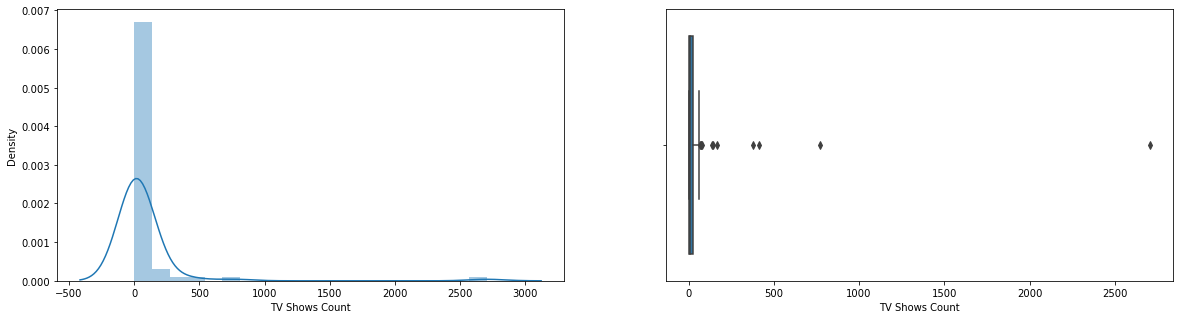

In [73]:
f, ax = plt.subplots(1, 2 , figsize = (20, 5))
sns.distplot(country_data_tvshows['TV Shows Count'], bins = 20, kde = True, ax = ax[0])
sns.boxplot(country_data_tvshows['TV Shows Count'], ax = ax[1])
plt.show()

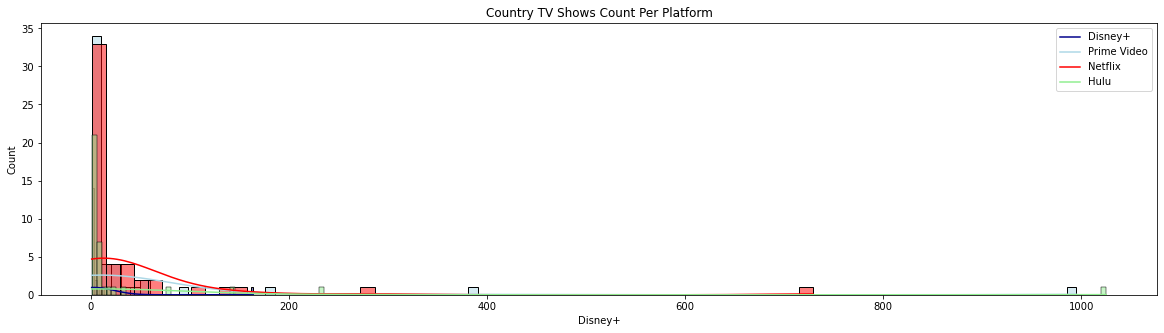

In [74]:
# Defining plot size and title
plt.figure(figsize = (20, 5))
plt.title('Country TV Shows Count Per Platform')
 
# Plotting the information from each dataset into a histogram
 
sns.histplot(disney_country_tvshows['Disney+'][:50], color = 'darkblue', legend = True, kde = True)  
sns.histplot(prime_video_country_tvshows['Prime Video'][:50], color = 'lightblue', legend = True, kde = True)
sns.histplot(netflix_country_tvshows['Netflix'][:50], color = 'red', legend = True, kde = True)
sns.histplot(hulu_country_tvshows['Hulu'][:50], color = 'lightgreen', legend = True, kde = True)                                
 
# Setting the legend
plt.legend(['Disney+', 'Prime Video', 'Netflix', 'Hulu'])
plt.show()

In [75]:
print(f'''
      The Country with Highest TV Shows Count Ever Got is '{df_country_high_tvshows['Country'][0]}' : '{df_country_high_tvshows['TV Shows Count'].max()}'\n
      The Country with Lowest TV Shows Count Ever Got is '{df_country_low_tvshows['Country'][0]}' : '{df_country_low_tvshows['TV Shows Count'].min()}'\n
      
      The Country with Highest TV Shows Count on 'Netflix' is '{netflix_country_high_tvshows['Country'][0]}' : '{netflix_country_high_tvshows['Netflix'].max()}'\n
      The Country with Lowest TV Shows Count on 'Netflix' is '{netflix_country_low_tvshows['Country'][0]}' : '{netflix_country_low_tvshows['Netflix'].min()}'\n
      
      The Country with Highest TV Shows Count on 'Hulu' is '{hulu_country_high_tvshows['Country'][0]}' : '{hulu_country_high_tvshows['Hulu'].max()}'\n
      The Country with Lowest TV Shows Count on 'Hulu' is '{hulu_country_low_tvshows['Country'][0]}' : '{hulu_country_low_tvshows['Hulu'].min()}'\n
      
      The Country with Highest TV Shows Count on 'Prime Video' is '{prime_video_country_high_tvshows['Country'][0]}' : '{prime_video_country_high_tvshows['Prime Video'].max()}'\n
      The Country with Lowest TV Shows Count on 'Prime Video' is '{prime_video_country_low_tvshows['Country'][0]}' : '{prime_video_country_low_tvshows['Prime Video'].min()}'\n
      
      The Country with Highest TV Shows Count on 'Disney+' is '{disney_country_high_tvshows['Country'][0]}' : '{disney_country_high_tvshows['Disney+'].max()}'\n
      The Country with Lowest TV Shows Count on 'Disney+' is '{disney_country_low_tvshows['Country'][0]}' : '{disney_country_low_tvshows['Disney+'].min()}'\n 
      ''')


      The Country with Highest TV Shows Count Ever Got is 'United States' : '2705'

      The Country with Lowest TV Shows Count Ever Got is 'Lithuania' : '1'

      
      The Country with Highest TV Shows Count on 'Netflix' is 'United States' : '729'

      The Country with Lowest TV Shows Count on 'Netflix' is 'Lithuania' : '0'

      
      The Country with Highest TV Shows Count on 'Hulu' is 'United States' : '1025'

      The Country with Lowest TV Shows Count on 'Hulu' is 'Lithuania' : '0'

      
      The Country with Highest TV Shows Count on 'Prime Video' is 'United States' : '995'

      The Country with Lowest TV Shows Count on 'Prime Video' is 'Korea' : '0'

      
      The Country with Highest TV Shows Count on 'Disney+' is 'United States' : '164'

      The Country with Lowest TV Shows Count on 'Disney+' is 'Chile' : '0'
 
      


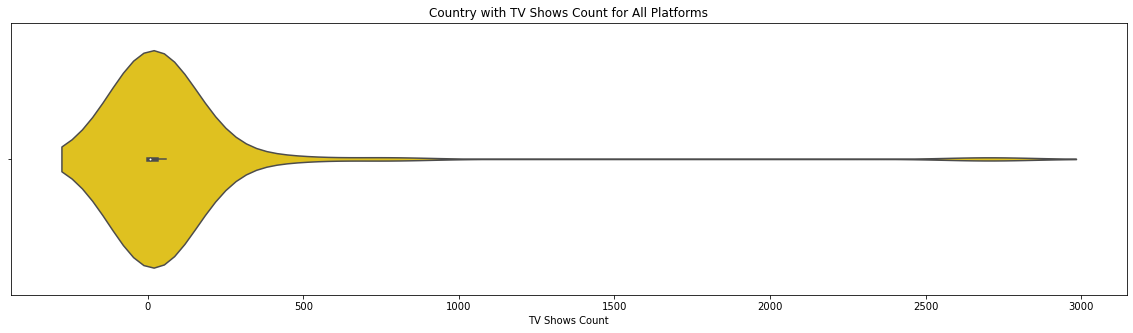

In [76]:
# Distribution of tvshows country in each platform
plt.figure(figsize = (20, 5))
plt.title('Country with TV Shows Count for All Platforms')
sns.violinplot(x = country_data_tvshows['TV Shows Count'][:100], color = 'gold', legend = True, kde = True, shade = False)
plt.show()

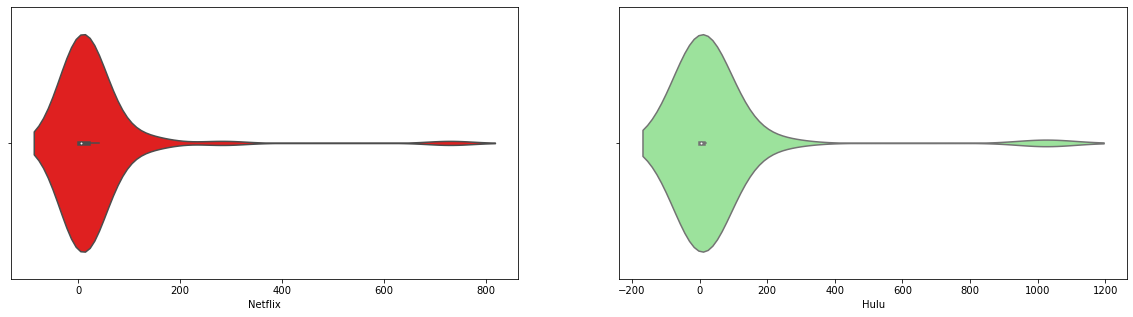

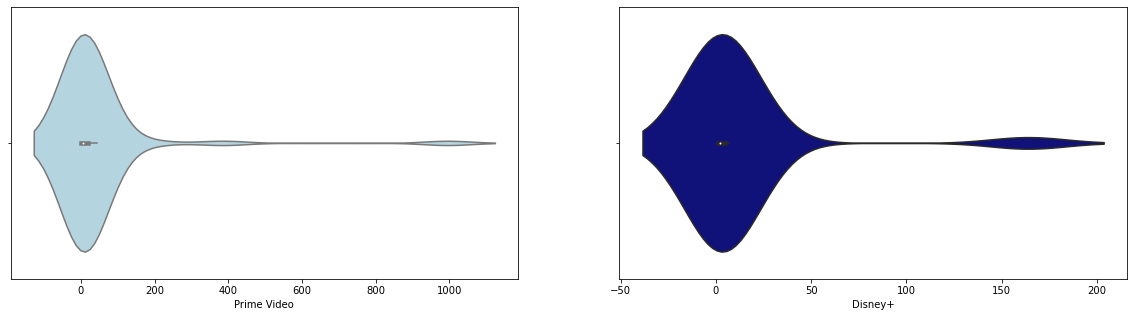

In [77]:
# Distribution of Country TV Shows Count in each platform
f1, ax1 = plt.subplots(1, 2 , figsize = (20, 5))
sns.violinplot(x = netflix_country_tvshows['Netflix'][:100], color = 'red', ax = ax1[0])
sns.violinplot(x = hulu_country_tvshows['Hulu'][:100], color = 'lightgreen', ax = ax1[1])
 
f2, ax2 = plt.subplots(1, 2 , figsize = (20, 5))
sns.violinplot(x = prime_video_country_tvshows['Prime Video'][:100], color = 'lightblue', ax = ax2[0])
sns.violinplot(x = disney_country_tvshows['Disney+'][:100], color = 'darkblue', ax = ax2[1])
plt.show()

In [78]:
print(f'''
      Accross All Platforms the Average TV Shows Count of Country is '{round(country_data_tvshows['TV Shows Count'].mean(), ndigits = 2)}'\n
      The Average TV Shows Count of Country on 'Netflix' is '{round(netflix_country_tvshows['Netflix'].mean(), ndigits = 2)}'\n
      The Average TV Shows Count of Country on 'Hulu' is '{round(hulu_country_tvshows['Hulu'].mean(), ndigits = 2)}'\n
      The Average TV Shows Count of Country on 'Prime Video' is '{round(prime_video_country_tvshows['Prime Video'].mean(), ndigits = 2)}'\n
      The Average TV Shows Count of Country on 'Disney+' is '{round(disney_country_tvshows['Disney+'].mean(), ndigits = 2)}'\n 
      ''')


      Accross All Platforms the Average TV Shows Count of Country is '75.93'

      The Average TV Shows Count of Country on 'Netflix' is '33.11'

      The Average TV Shows Count of Country on 'Hulu' is '46.03'

      The Average TV Shows Count of Country on 'Prime Video' is '38.65'

      The Average TV Shows Count of Country on 'Disney+' is '11.4'
 
      


In [79]:
print(f'''
      Accross All Platforms Total Count of Country is '{country_data_tvshows['Country'].unique().shape[0]}'\n
      Total Count of Country on 'Netflix' is '{netflix_country_tvshows['Country'].unique().shape[0]}'\n
      Total Count of Country on 'Hulu' is '{hulu_country_tvshows['Country'].unique().shape[0]}'\n
      Total Count of Country on 'Prime Video' is '{prime_video_country_tvshows['Country'].unique().shape[0]}'\n
      Total Count of Country on 'Disney+' is '{disney_country_tvshows['Country'].unique().shape[0]}'\n 
      ''')


      Accross All Platforms Total Count of Country is '74'

      Total Count of Country on 'Netflix' is '62'

      Total Count of Country on 'Hulu' is '36'

      Total Count of Country on 'Prime Video' is '55'

      Total Count of Country on 'Disney+' is '20'
 
      


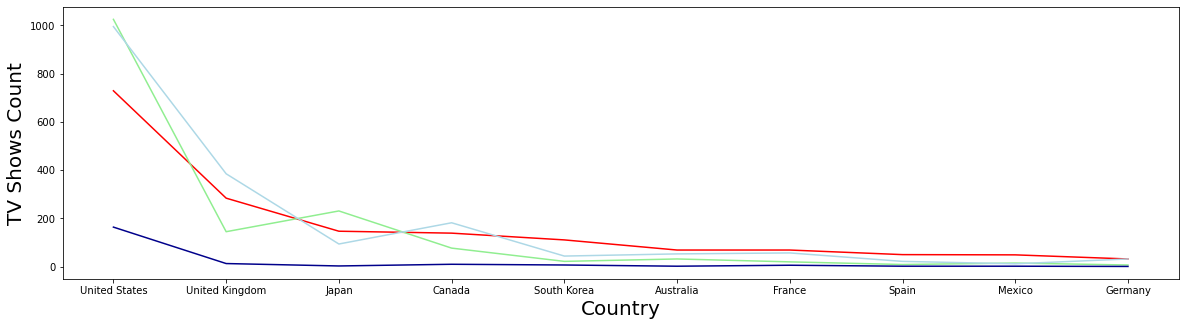

In [80]:
plt.figure(figsize = (20, 5))
sns.lineplot(x = country_data_tvshows['Country'][:10], y = country_data_tvshows['Netflix'][:10], color = 'red')
sns.lineplot(x = country_data_tvshows['Country'][:10], y = country_data_tvshows['Hulu'][:10], color = 'lightgreen')
sns.lineplot(x = country_data_tvshows['Country'][:10], y = country_data_tvshows['Prime Video'][:10], color = 'lightblue')
sns.lineplot(x = country_data_tvshows['Country'][:10], y = country_data_tvshows['Disney+'][:10], color = 'darkblue')
plt.xlabel('Country', fontsize = 20)
plt.ylabel('TV Shows Count', fontsize = 20)
plt.show()

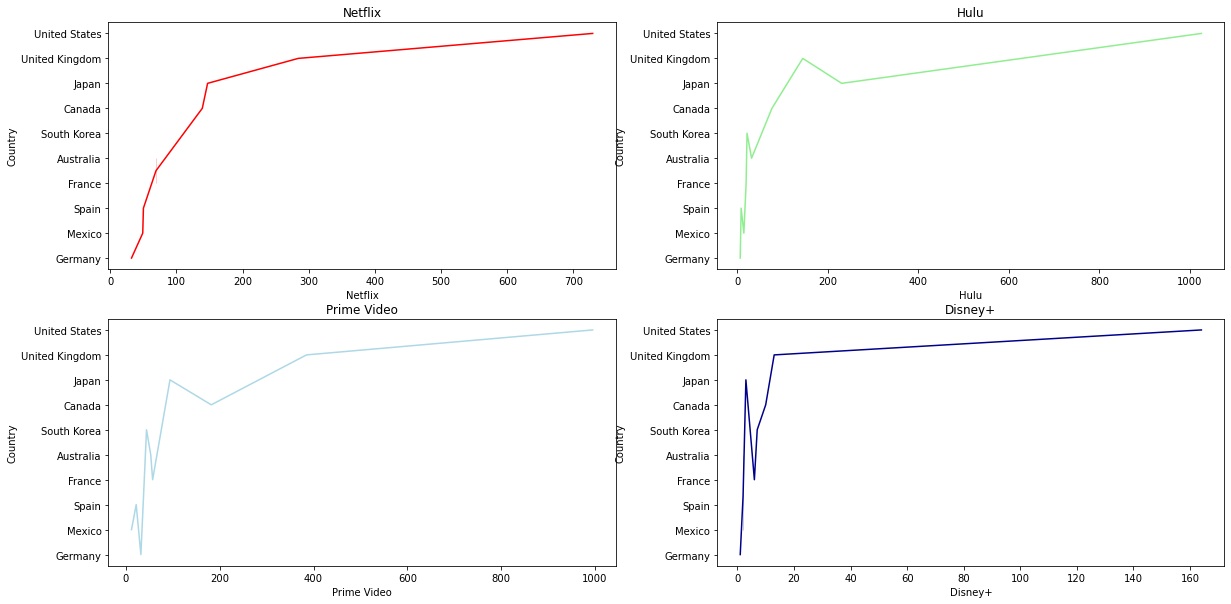

In [81]:
fig, axes = plt.subplots(2, 2, figsize = (20 , 10))
 
n_co_ax1 = sns.lineplot(y = country_data_tvshows['Country'][:10], x = country_data_tvshows['Netflix'][:10], color = 'red', ax = axes[0, 0])
h_co_ax2 = sns.lineplot(y = country_data_tvshows['Country'][:10], x = country_data_tvshows['Hulu'][:10], color = 'lightgreen', ax = axes[0, 1])
p_co_ax3 = sns.lineplot(y = country_data_tvshows['Country'][:10], x = country_data_tvshows['Prime Video'][:10], color = 'lightblue', ax = axes[1, 0])
d_co_ax4 = sns.lineplot(y = country_data_tvshows['Country'][:10], x = country_data_tvshows['Disney+'][:10], color = 'darkblue', ax = axes[1, 1])
 
labels = ['Netflix', 'Hulu', 'Prime Video', 'Disney+']
 
n_co_ax1.title.set_text(labels[0])
h_co_ax2.title.set_text(labels[1])
p_co_ax3.title.set_text(labels[2])
d_co_ax4.title.set_text(labels[3])
 
plt.show()

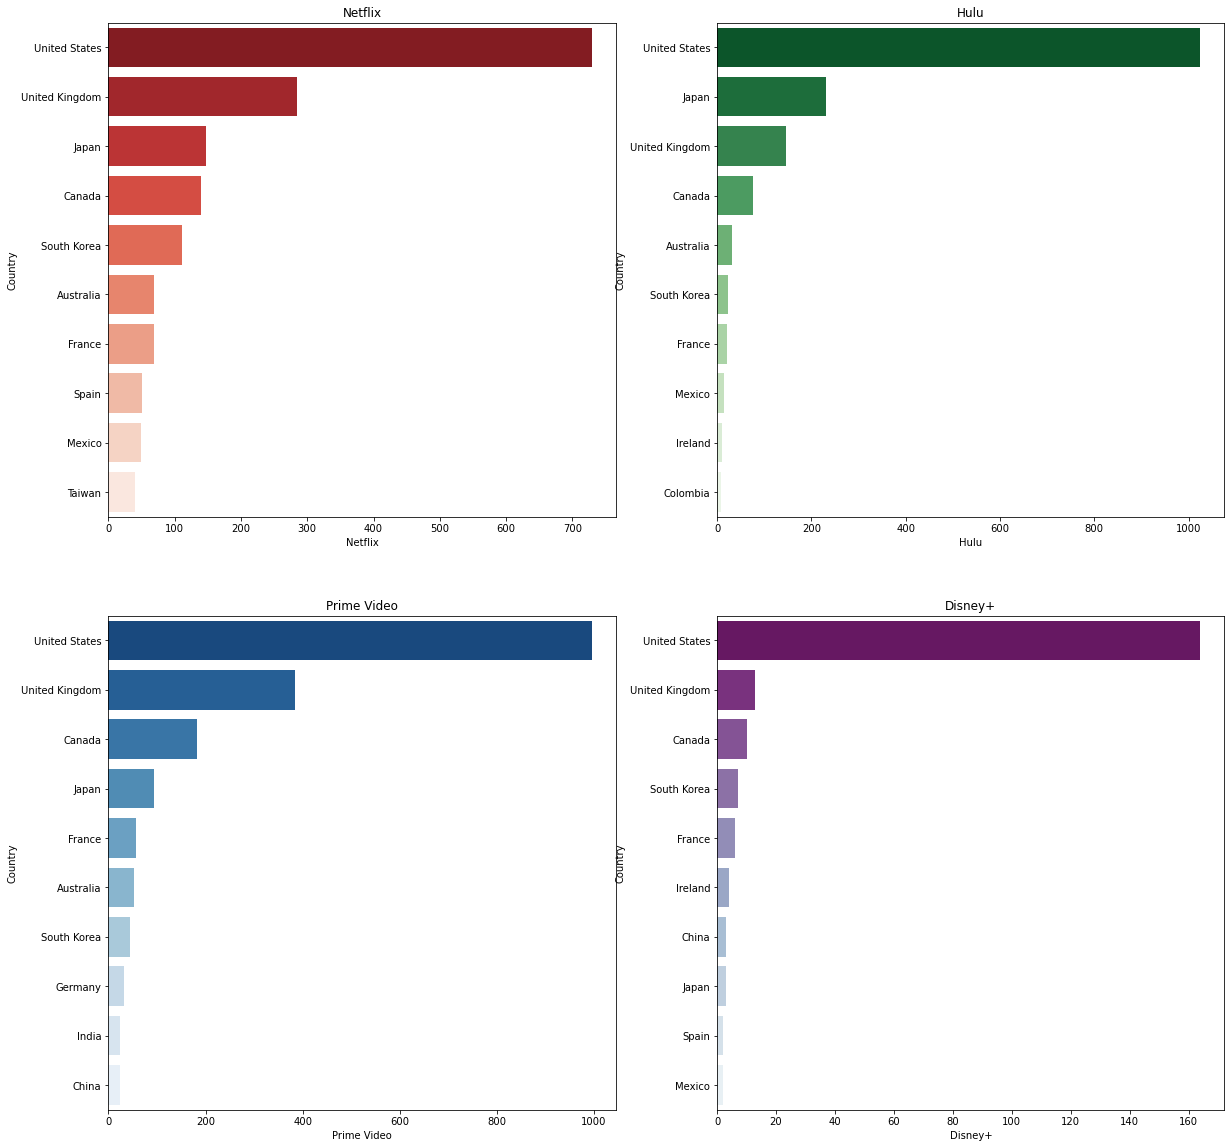

In [82]:
fig, axes = plt.subplots(2, 2, figsize = (20 , 20))
 
n_co_ax1 = sns.barplot(y = netflix_country_tvshows['Country'][:10], x = netflix_country_tvshows['Netflix'][:10], palette = 'Reds_r', ax = axes[0, 0])
h_co_ax2 = sns.barplot(y = hulu_country_tvshows['Country'][:10], x = hulu_country_tvshows['Hulu'][:10], palette = 'Greens_r', ax = axes[0, 1])
p_co_ax3 = sns.barplot(y = prime_video_country_tvshows['Country'][:10], x = prime_video_country_tvshows['Prime Video'][:10], palette = 'Blues_r', ax = axes[1, 0])
d_co_ax4 = sns.barplot(y = disney_country_tvshows['Country'][:10], x = disney_country_tvshows['Disney+'][:10], palette = 'BuPu_r', ax = axes[1, 1])
 
labels = ['Netflix', 'Hulu', 'Prime Video', 'Disney+']
 
n_co_ax1.title.set_text(labels[0])
h_co_ax2.title.set_text(labels[1])
p_co_ax3.title.set_text(labels[2])
d_co_ax4.title.set_text(labels[3])
 
plt.show()

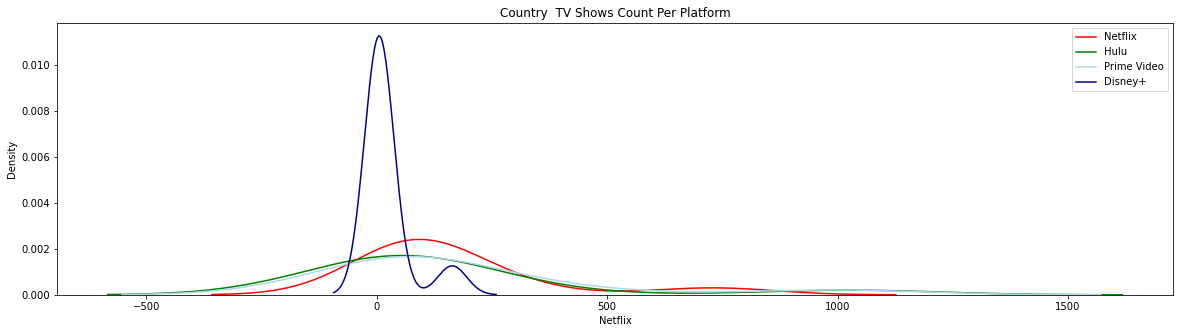

In [83]:
# Defining plot size and title
plt.figure(figsize = (20, 5))
plt.title('Country  TV Shows Count Per Platform')
 
# Plotting the information from each dataset into a histogram
sns.kdeplot(netflix_country_tvshows['Netflix'][:10], color = 'red', legend = True)
sns.kdeplot(hulu_country_tvshows['Hulu'][:10], color = 'green', legend = True)
sns.kdeplot(prime_video_country_tvshows['Prime Video'][:10], color = 'lightblue', legend = True)
sns.kdeplot(disney_country_tvshows['Disney+'][:10], color = 'darkblue', legend = True)                                      
                                      
# Setting the legend
plt.legend(['Netflix', 'Hulu', 'Prime Video', 'Disney+'])
plt.show()

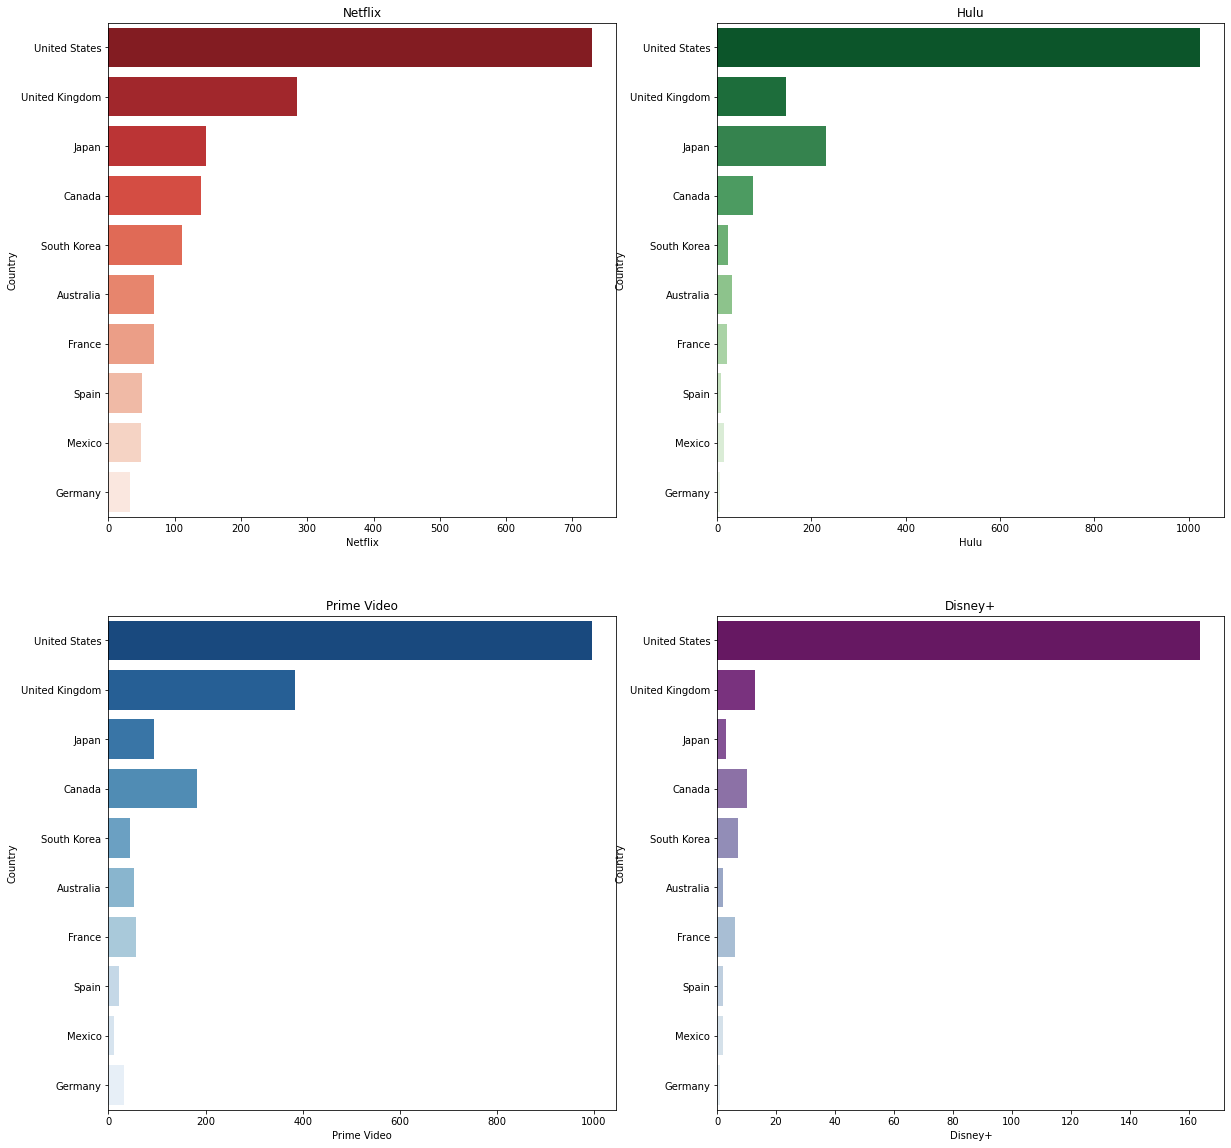

In [84]:
fig, axes = plt.subplots(2, 2, figsize = (20 , 20))
 
n_co_ax1 = sns.barplot(y = country_data_tvshows['Country'][:10], x = country_data_tvshows['Netflix'][:10], palette = 'Reds_r', ax = axes[0, 0])
h_co_ax2 = sns.barplot(y = country_data_tvshows['Country'][:10], x = country_data_tvshows['Hulu'][:10], palette = 'Greens_r', ax = axes[0, 1])
p_co_ax3 = sns.barplot(y = country_data_tvshows['Country'][:10], x = country_data_tvshows['Prime Video'][:10], palette = 'Blues_r', ax = axes[1, 0])
d_co_ax4 = sns.barplot(y = country_data_tvshows['Country'][:10], x = country_data_tvshows['Disney+'][:10], palette = 'BuPu_r', ax = axes[1, 1])
 
labels = ['Netflix', 'Hulu', 'Prime Video', 'Disney+']
 
n_co_ax1.title.set_text(labels[0])
h_co_ax2.title.set_text(labels[1])
p_co_ax3.title.set_text(labels[2])
d_co_ax4.title.set_text(labels[3])
 
plt.show()

In [85]:
df_tvshows_mixed_countries.drop(df_tvshows_mixed_countries.loc[df_tvshows_mixed_countries['Country'] == "NA"].index, inplace = True)
# df_tvshows_mixed_countries = df_tvshows_mixed_countries[df_tvshows_mixed_countries.Country != "NA"]
df_tvshows_mixed_countries.drop(df_tvshows_mixed_countries.loc[df_tvshows_mixed_countries['Number of Countries'] == 1].index, inplace = True)

In [86]:
df_tvshows_mixed_countries.head(5)

ID                 Title  Year Age IMDb Rotten Tomatoes  \
2    3                  Roma  2018  18  8.7              93   
4    5   The Young Offenders  2016  NR    8             100   
23  24              La tribu  2018  18  7.6              71   
38  39               Heroine  2012  NR  7.4              50   
51  52  Abominable Christmas  2012  NR  5.3              NA   

            Directors                                               Cast  \
2                  NA  Kevin McKidd,Ray Stevenson,Polly Walker,Kerry ...   
4                  NA  Alex Murphy,Chris Walley,Hilary Rose,Dominic M...   
23                 NA  Caleb Ross,Victoria Spence,Meryl Cassie,Antoni...   
38                 NA  Eliza Dushku,Shawn Reaves,Zach Galifianakis,A....   
51  Chad Van De Keere  Ariel Winter,Drake Bell,Emilio Estevez,Isabell...   

                                     Genres  \
2          Action,Drama,History,Romance,War   
4                                    Comedy   
23                     Drama,Romance,Sci-Fi   
38           Drama,Fantasy,Mystery,Thriller   
51  Animation,Short,Adventure,Comedy,Family   

                                              Country  ... Runtime       Kind  \
2                        United Kingdom,United States  ...      52  tv series   
4                              United Kingdom,Ireland  ...      30  tv series   
23                         New Zealand,United Kingdom  ...      30  tv series   
38                               United States,Canada  ...      43  tv series   
51  United States,India,Canada,Sri Lanka,South Afr...  ...      43  tv series   

   Seasons Netflix Hulu  Prime Video  Disney+  Type  Service Provider  \
2        2       1    0            0        0     1           Netflix   
4        3       1    0            0        0     1           Netflix   
23       5       1    0            0        0     1           Netflix   
38       2       1    0            0        0     1           Netflix   
51      NA       1    0            0        0     1           Netflix   

    Number of Countries  
2                     2  
4                     2  
23                    2  
38                    2  
51                    6  

[5 rows x 22 columns]

In [87]:
mixed_countries_count = df_tvshows_mixed_countries.groupby('Country')['Title'].count()
mixed_countries_tvshows = df_tvshows_mixed_countries.groupby('Country')[['Netflix', 'Hulu', 'Prime Video', 'Disney+']].sum()
mixed_countries_data_tvshows = pd.concat([mixed_countries_count, mixed_countries_tvshows], axis = 1).reset_index().rename(columns = {'Title' : 'TV Shows Count', 'Country' : 'Mixed Country'})
mixed_countries_data_tvshows = mixed_countries_data_tvshows.sort_values(by = 'TV Shows Count', ascending = False)

In [88]:
mixed_countries_data_tvshows.head(5)

Mixed Country  TV Shows Count  Netflix  Hulu  Prime Video  \
178          United States,Canada              53       20    13           20   
168  United Kingdom,United States              47        8    10           31   
25           Canada,United States              42       14    14           19   
227  United States,United Kingdom              25        7     6           14   
155        United Kingdom,Ireland               8        3     1            4   

     Disney+  
178        5  
168        1  
25         1  
227        0  
155        0

In [89]:
# Mixed Country with TV Shows Counts - All Platforms Combined
mixed_countries_data_tvshows.sort_values(by = 'TV Shows Count', ascending = False)[:10]

Mixed Country  TV Shows Count  Netflix  Hulu  \
178                 United States,Canada              53       20    13   
168         United Kingdom,United States              47        8    10   
25                  Canada,United States              42       14    14   
227         United States,United Kingdom              25        7     6   
155               United Kingdom,Ireland               8        3     1   
207                  United States,Japan               8        6     2   
218            United States,South Korea               7        1     2   
16                         Canada,France               6        1     2   
23                 Canada,United Kingdom               6        2     3   
145  United Kingdom,Canada,United States               5        2     0   

     Prime Video  Disney+  
178           20        5  
168           31        1  
25            19        1  
227           14        0  
155            4        0  
207            1        0  
218            2        2  
16             5        0  
23             1        0  
145            3        0

In [90]:
df_mixed_countries_high_tvshows = mixed_countries_data_tvshows.sort_values(by = 'TV Shows Count', ascending = False).reset_index()
df_mixed_countries_high_tvshows = df_mixed_countries_high_tvshows.drop(['index'], axis = 1)
# filter = (mixed_countries_data_tvshows['TV Shows Count'] = =  (mixed_countries_data_tvshows['TV Shows Count'].max()))
# df_mixed_countries_high_tvshows = mixed_countries_data_tvshows[filter]
 
# highest_rated_tvshows = mixed_countries_data_tvshows.loc[mixed_countries_data_tvshows['TV Shows Count'].idxmax()]
 
print('\nMixed Country with Highest Ever TV Shows Count are : All Platforms Combined\n')
df_mixed_countries_high_tvshows.head(5)


Mixed Country with Highest Ever TV Shows Count are : All Platforms Combined



Mixed Country  TV Shows Count  Netflix  Hulu  Prime Video  \
0          United States,Canada              53       20    13           20   
1  United Kingdom,United States              47        8    10           31   
2          Canada,United States              42       14    14           19   
3  United States,United Kingdom              25        7     6           14   
4        United Kingdom,Ireland               8        3     1            4   

   Disney+  
0        5  
1        1  
2        1  
3        0  
4        0

In [91]:
fig = px.bar(y = df_mixed_countries_high_tvshows['Mixed Country'][:15],
             x = df_mixed_countries_high_tvshows['TV Shows Count'][:15], 
             color = df_mixed_countries_high_tvshows['TV Shows Count'][:15],
             color_continuous_scale = 'Teal_r', 
             labels = { 'y' : 'TV Shows', 'x' : 'Number of Mixed Country'},
             title  = 'TV Shows with Highest Number of Mixed Countries : All Platforms')

fig.update_layout(plot_bgcolor = 'white')
fig.show()

In [92]:
df_mixed_countries_low_tvshows = mixed_countries_data_tvshows.sort_values(by = 'TV Shows Count', ascending = True).reset_index()
df_mixed_countries_low_tvshows = df_mixed_countries_low_tvshows.drop(['index'], axis = 1)
# filter = (mixed_countries_data_tvshows['TV Shows Count'] = =  (mixed_countries_data_tvshows['TV Shows Count'].min()))
# df_mixed_countries_low_tvshows = mixed_countries_data_tvshows[filter]
 
print('\nMixed Country with Lowest Ever TV Shows Count are : All Platforms Combined\n')
df_mixed_countries_low_tvshows.head(5)


Mixed Country with Lowest Ever TV Shows Count are : All Platforms Combined



Mixed Country  TV Shows Count  Netflix  Hulu  \
0     United States,Ireland,United Kingdom               1        0     0   
1                 France,South Korea,Spain               1        1     0   
2  France,South Korea,United States,Canada               1        0     0   
3      France,United Kingdom,United States               1        1     0   
4                     France,United States               1        1     0   

   Prime Video  Disney+  
0            1        0  
1            1        0  
2            1        0  
3            0        0  
4            1        0

In [93]:
fig = px.bar(y = df_mixed_countries_low_tvshows['Mixed Country'][:15],
             x = df_mixed_countries_low_tvshows['TV Shows Count'][:15], 
             color = df_mixed_countries_low_tvshows['TV Shows Count'][:15],
             color_continuous_scale = 'Teal_r', 
             labels = { 'y' : 'TV Shows', 'x' : 'Number of Mixed Country'},
             title  = 'TV Shows with Lowest Number of Mixed Countries : All Platforms')

fig.update_layout(plot_bgcolor = 'white')
fig.show()

In [94]:
print(f'''
      Total '{df_tvshows_countries['Country'].count()}' Titles are available on All Platforms, out of which\n
      You Can Choose to see TV Shows from Total '{mixed_countries_data_tvshows['Mixed Country'].unique().shape[0]}' Mixed Country, They were Like this, \n
 
      {mixed_countries_data_tvshows.sort_values(by = 'TV Shows Count', ascending = False)['Mixed Country'].head(5).unique()} etc. \n
 
      The Mixed Country with Highest TV Shows Count have '{mixed_countries_data_tvshows['TV Shows Count'].max()}' TV Shows Available is '{df_mixed_countries_high_tvshows['Mixed Country'][0]}', &\n
      The Mixed Country with Lowest TV Shows Count have '{mixed_countries_data_tvshows['TV Shows Count'].min()}' TV Shows Available is '{df_mixed_countries_low_tvshows['Mixed Country'][0]}'
      ''')


      Total '4883' Titles are available on All Platforms, out of which

      You Can Choose to see TV Shows from Total '233' Mixed Country, They were Like this, 

 
      ['United States,Canada' 'United Kingdom,United States'
 'Canada,United States' 'United States,United Kingdom'
 'United Kingdom,Ireland'] etc. 

 
      The Mixed Country with Highest TV Shows Count have '53' TV Shows Available is 'United States,Canada', &

      The Mixed Country with Lowest TV Shows Count have '1' TV Shows Available is 'United States,Ireland,United Kingdom'
      


In [95]:
fig = px.pie(mixed_countries_data_tvshows[:10], names = 'Mixed Country', values = 'TV Shows Count', color_discrete_sequence = px.colors.sequential.Teal)
fig.update_traces(textposition = 'inside', textinfo = 'percent+label', title = 'TV Shows Count based on Mixed Country')
fig.show()

In [96]:
# netflix_mixed_countries_tvshows = mixed_countries_data_tvshows[mixed_countries_data_tvshows['Netflix'] !=  0].sort_values(by = 'Netflix', ascending = False).reset_index()
# netflix_mixed_countries_tvshows = netflix_mixed_countries_tvshows.drop(['index', 'Hulu', 'Prime Video', 'Disney+', 'TV Shows Count'], axis = 1)
 
netflix_mixed_countries_high_tvshows = df_mixed_countries_high_tvshows.sort_values(by = 'Netflix', ascending = False).reset_index()
netflix_mixed_countries_high_tvshows = netflix_mixed_countries_high_tvshows.drop(['index'], axis = 1)
 
netflix_mixed_countries_low_tvshows = df_mixed_countries_high_tvshows.sort_values(by = 'Netflix', ascending = True).reset_index()
netflix_mixed_countries_low_tvshows = netflix_mixed_countries_low_tvshows.drop(['index'], axis = 1)
 
netflix_mixed_countries_high_tvshows.head(5)

Mixed Country  TV Shows Count  Netflix  Hulu  Prime Video  \
0          United States,Canada              53       20    13           20   
1          Canada,United States              42       14    14           19   
2  United Kingdom,United States              47        8    10           31   
3  United States,United Kingdom              25        7     6           14   
4           United States,Japan               8        6     2            1   

   Disney+  
0        5  
1        1  
2        1  
3        0  
4        0

In [97]:
# hulu_mixed_countries_tvshows = mixed_countries_data_tvshows[mixed_countries_data_tvshows['Hulu'] !=  0].sort_values(by = 'Hulu', ascending = False).reset_index()
# hulu_mixed_countries_tvshows = hulu_mixed_countries_tvshows.drop(['index', 'Netflix', 'Prime Video', 'Disney+', 'TV Shows Count'], axis = 1)
 
hulu_mixed_countries_high_tvshows = df_mixed_countries_high_tvshows.sort_values(by = 'Hulu', ascending = False).reset_index()
hulu_mixed_countries_high_tvshows = hulu_mixed_countries_high_tvshows.drop(['index'], axis = 1)
 
hulu_mixed_countries_low_tvshows = df_mixed_countries_high_tvshows.sort_values(by = 'Hulu', ascending = True).reset_index()
hulu_mixed_countries_low_tvshows = hulu_mixed_countries_low_tvshows.drop(['index'], axis = 1)
 
hulu_mixed_countries_high_tvshows.head(5)

Mixed Country  TV Shows Count  Netflix  Hulu  Prime Video  \
0          Canada,United States              42       14    14           19   
1          United States,Canada              53       20    13           20   
2  United Kingdom,United States              47        8    10           31   
3  United States,United Kingdom              25        7     6           14   
4         Canada,United Kingdom               6        2     3            1   

   Disney+  
0        1  
1        5  
2        1  
3        0  
4        0

In [98]:
# prime_video_mixed_countries_tvshows = mixed_countries_data_tvshows[mixed_countries_data_tvshows['Prime Video'] !=  0].sort_values(by = 'Prime Video', ascending = False).reset_index()
# prime_video_mixed_countries_tvshows = prime_video_mixed_countries_tvshows.drop(['index', 'Netflix', 'Hulu', 'Disney+', 'TV Shows Count'], axis = 1)
 
prime_video_mixed_countries_high_tvshows = df_mixed_countries_high_tvshows.sort_values(by = 'Prime Video', ascending = False).reset_index()
prime_video_mixed_countries_high_tvshows = prime_video_mixed_countries_high_tvshows.drop(['index'], axis = 1)
 
prime_video_mixed_countries_low_tvshows = df_mixed_countries_high_tvshows.sort_values(by = 'Prime Video', ascending = True).reset_index()
prime_video_mixed_countries_low_tvshows = prime_video_mixed_countries_low_tvshows.drop(['index'], axis = 1)
 
prime_video_mixed_countries_high_tvshows.head(5)

Mixed Country  TV Shows Count  Netflix  Hulu  Prime Video  \
0  United Kingdom,United States              47        8    10           31   
1          United States,Canada              53       20    13           20   
2          Canada,United States              42       14    14           19   
3  United States,United Kingdom              25        7     6           14   
4                 Canada,France               6        1     2            5   

   Disney+  
0        1  
1        5  
2        1  
3        0  
4        0

In [99]:
# disney_mixed_countries_tvshows = mixed_countries_data_tvshows[mixed_countries_data_tvshows['Disney+'] !=  0].sort_values(by = 'Disney+', ascending = False).reset_index()
# disney_mixed_countries_tvshows = disney_mixed_countries_tvshows.drop(['index', 'Netflix', 'Hulu', 'Prime Video', 'TV Shows Count'], axis = 1)
 
disney_mixed_countries_high_tvshows = df_mixed_countries_high_tvshows.sort_values(by = 'Disney+', ascending = False).reset_index()
disney_mixed_countries_high_tvshows = disney_mixed_countries_high_tvshows.drop(['index'], axis = 1)
 
disney_mixed_countries_low_tvshows = df_mixed_countries_high_tvshows.sort_values(by = 'Disney+', ascending = True).reset_index()
disney_mixed_countries_low_tvshows = disney_mixed_countries_low_tvshows.drop(['index'], axis = 1)
 
disney_mixed_countries_high_tvshows.head(5)

Mixed Country  TV Shows Count  Netflix  \
0                               United States,Canada              53       20   
1                                United States,India               2        0   
2                          United States,South Korea               7        1   
3  United States,Hong Kong,South Korea,France,Can...               1        0   
4                              Ireland,United States               2        0   

   Hulu  Prime Video  Disney+  
0    13           20        5  
1     0            0        2  
2     2            2        2  
3     0            0        1  
4     0            1        1

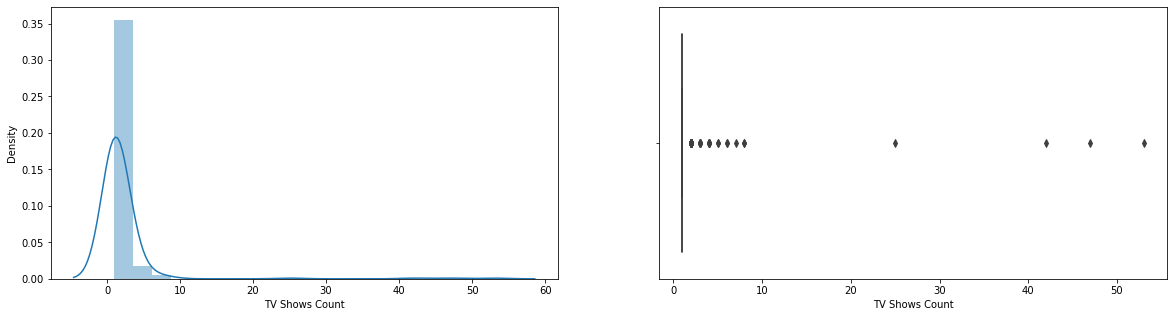

In [100]:
f, ax = plt.subplots(1, 2 , figsize = (20, 5))
sns.distplot(mixed_countries_data_tvshows['TV Shows Count'], bins = 20, kde = True, ax = ax[0])
sns.boxplot(mixed_countries_data_tvshows['TV Shows Count'], ax = ax[1])
plt.show()

In [101]:
# Creating distinct dataframes only with the tvshows present on individual streaming platforms
netflix_mixed_countries_tvshows = mixed_countries_data_tvshows[mixed_countries_data_tvshows['Netflix'] !=  0].sort_values(by = 'Netflix', ascending = False).reset_index()
netflix_mixed_countries_tvshows = netflix_mixed_countries_tvshows.drop(['index', 'Hulu', 'Prime Video', 'Disney+', 'TV Shows Count'], axis = 1)

hulu_mixed_countries_tvshows = mixed_countries_data_tvshows[mixed_countries_data_tvshows['Hulu'] !=  0].sort_values(by = 'Hulu', ascending = False).reset_index()
hulu_mixed_countries_tvshows = hulu_mixed_countries_tvshows.drop(['index', 'Netflix', 'Prime Video', 'Disney+', 'TV Shows Count'], axis = 1)

prime_video_mixed_countries_tvshows = mixed_countries_data_tvshows[mixed_countries_data_tvshows['Prime Video'] !=  0].sort_values(by = 'Prime Video', ascending = False).reset_index()
prime_video_mixed_countries_tvshows = prime_video_mixed_countries_tvshows.drop(['index', 'Netflix', 'Hulu', 'Disney+', 'TV Shows Count'], axis = 1)

disney_mixed_countries_tvshows = mixed_countries_data_tvshows[mixed_countries_data_tvshows['Disney+'] !=  0].sort_values(by = 'Disney+', ascending = False).reset_index()
disney_mixed_countries_tvshows = disney_mixed_countries_tvshows.drop(['index', 'Netflix', 'Hulu', 'Prime Video', 'TV Shows Count'], axis = 1)

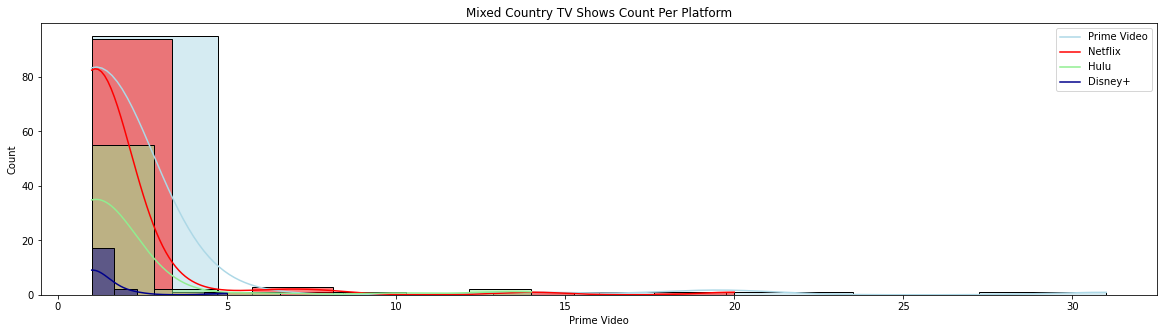

In [102]:
# Defining plot size and title
plt.figure(figsize = (20, 5))
plt.title('Mixed Country TV Shows Count Per Platform')
 
# Plotting the information from each dataset into a histogram
 
sns.histplot(prime_video_mixed_countries_tvshows['Prime Video'][:100], color = 'lightblue', legend = True, kde = True)
sns.histplot(netflix_mixed_countries_tvshows['Netflix'][:100], color = 'red', legend = True, kde = True)
sns.histplot(hulu_mixed_countries_tvshows['Hulu'][:100], color = 'lightgreen', legend = True, kde = True)
sns.histplot(disney_mixed_countries_tvshows['Disney+'][:100], color = 'darkblue', legend = True, kde = True)                                
 
# Setting the legend
plt.legend(['Prime Video', 'Netflix', 'Hulu', 'Disney+'])
plt.show()

In [103]:
print(f'''
      The Mixed Country with Highest TV Shows Count Ever Got is '{df_mixed_countries_high_tvshows['Mixed Country'][0]}' : '{df_mixed_countries_high_tvshows['TV Shows Count'].max()}'\n
      The Mixed Country with Lowest TV Shows Count Ever Got is '{df_mixed_countries_low_tvshows['Mixed Country'][0]}' : '{df_mixed_countries_low_tvshows['TV Shows Count'].min()}'\n
      
      The Mixed Country with Highest TV Shows Count on 'Netflix' is '{netflix_mixed_countries_high_tvshows['Mixed Country'][0]}' : '{netflix_mixed_countries_high_tvshows['Netflix'].max()}'\n
      The Mixed Country with Lowest TV Shows Count on 'Netflix' is '{netflix_mixed_countries_low_tvshows['Mixed Country'][0]}' : '{netflix_mixed_countries_low_tvshows['Netflix'].min()}'\n
      
      The Mixed Country with Highest TV Shows Count on 'Hulu' is '{hulu_mixed_countries_high_tvshows['Mixed Country'][0]}' : '{hulu_mixed_countries_high_tvshows['Hulu'].max()}'\n
      The Mixed Country with Lowest TV Shows Count on 'Hulu' is '{hulu_mixed_countries_low_tvshows['Mixed Country'][0]}' : '{hulu_mixed_countries_low_tvshows['Hulu'].min()}'\n
      
      The Mixed Country with Highest TV Shows Count on 'Prime Video' is '{prime_video_mixed_countries_high_tvshows['Mixed Country'][0]}' : '{prime_video_mixed_countries_high_tvshows['Prime Video'].max()}'\n
      The Mixed Country with Lowest TV Shows Count on 'Prime Video' is '{prime_video_mixed_countries_low_tvshows['Mixed Country'][0]}' : '{prime_video_mixed_countries_low_tvshows['Prime Video'].min()}'\n
      
      The Mixed Country with Highest TV Shows Count on 'Disney+' is '{disney_mixed_countries_high_tvshows['Mixed Country'][0]}' : '{disney_mixed_countries_high_tvshows['Disney+'].max()}'\n
      The Mixed Country with Lowest TV Shows Count on 'Disney+' is '{disney_mixed_countries_low_tvshows['Mixed Country'][0]}' : '{disney_mixed_countries_low_tvshows['Disney+'].min()}'\n 
      ''')


      The Mixed Country with Highest TV Shows Count Ever Got is 'United States,Canada' : '53'

      The Mixed Country with Lowest TV Shows Count Ever Got is 'United States,Ireland,United Kingdom' : '1'

      
      The Mixed Country with Highest TV Shows Count on 'Netflix' is 'United States,Canada' : '20'

      The Mixed Country with Lowest TV Shows Count on 'Netflix' is 'Japan,France' : '0'

      
      The Mixed Country with Highest TV Shows Count on 'Hulu' is 'Canada,United States' : '14'

      The Mixed Country with Lowest TV Shows Count on 'Hulu' is 'United States,United Kingdom,South Korea' : '0'

      
      The Mixed Country with Highest TV Shows Count on 'Prime Video' is 'United Kingdom,United States' : '31'

      The Mixed Country with Lowest TV Shows Count on 'Prime Video' is 'Japan,France' : '0'

      
      The Mixed Country with Highest TV Shows Count on 'Disney+' is 'United States,Canada' : '5'

      The Mixed Country with Lowest TV Shows Count on 'Disney+' is 

In [104]:
print(f'''
      Accross All Platforms the Average TV Shows Count of Mixed Country is '{round(mixed_countries_data_tvshows['TV Shows Count'].mean(), ndigits = 2)}'\n
      The Average TV Shows Count of Mixed Country on 'Netflix' is '{round(netflix_mixed_countries_tvshows['Netflix'].mean(), ndigits = 2)}'\n
      The Average TV Shows Count of Mixed Country on 'Hulu' is '{round(hulu_mixed_countries_tvshows['Hulu'].mean(), ndigits = 2)}'\n
      The Average TV Shows Count of Mixed Country on 'Prime Video' is '{round(prime_video_mixed_countries_tvshows['Prime Video'].mean(), ndigits = 2)}'\n
      The Average TV Shows Count of Mixed Country on 'Disney+' is '{round(disney_mixed_countries_tvshows['Disney+'].mean(), ndigits = 2)}'\n 
      ''')


      Accross All Platforms the Average TV Shows Count of Mixed Country is '2.14'

      The Average TV Shows Count of Mixed Country on 'Netflix' is '1.57'

      The Average TV Shows Count of Mixed Country on 'Hulu' is '1.84'

      The Average TV Shows Count of Mixed Country on 'Prime Video' is '1.89'

      The Average TV Shows Count of Mixed Country on 'Disney+' is '1.3'
 
      


In [105]:
print(f'''
      Accross All Platforms Total Count of Mixed Country is '{mixed_countries_data_tvshows['Mixed Country'].unique().shape[0]}'\n
      Total Count of Mixed Country on 'Netflix' is '{netflix_mixed_countries_tvshows['Mixed Country'].unique().shape[0]}'\n
      Total Count of Mixed Country on 'Hulu' is '{hulu_mixed_countries_tvshows['Mixed Country'].unique().shape[0]}'\n
      Total Count of Mixed Country on 'Prime Video' is '{prime_video_mixed_countries_tvshows['Mixed Country'].unique().shape[0]}'\n
      Total Count of Mixed Country on 'Disney+' is '{disney_mixed_countries_tvshows['Mixed Country'].unique().shape[0]}'\n 
      ''')


      Accross All Platforms Total Count of Mixed Country is '233'

      Total Count of Mixed Country on 'Netflix' is '125'

      Total Count of Mixed Country on 'Hulu' is '61'

      Total Count of Mixed Country on 'Prime Video' is '114'

      Total Count of Mixed Country on 'Disney+' is '20'
 
      


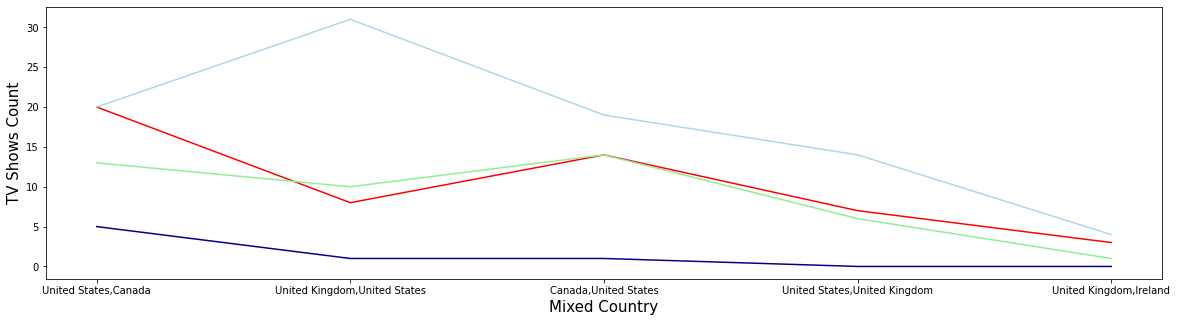

In [106]:
plt.figure(figsize = (20, 5))
sns.lineplot(x = mixed_countries_data_tvshows['Mixed Country'][:5], y = mixed_countries_data_tvshows['Netflix'][:5], color = 'red')
sns.lineplot(x = mixed_countries_data_tvshows['Mixed Country'][:5], y = mixed_countries_data_tvshows['Hulu'][:5], color = 'lightgreen')
sns.lineplot(x = mixed_countries_data_tvshows['Mixed Country'][:5], y = mixed_countries_data_tvshows['Prime Video'][:5], color = 'lightblue')
sns.lineplot(x = mixed_countries_data_tvshows['Mixed Country'][:5], y = mixed_countries_data_tvshows['Disney+'][:5], color = 'darkblue')
plt.xlabel('Mixed Country', fontsize = 15)
plt.ylabel('TV Shows Count', fontsize = 15)
plt.show()

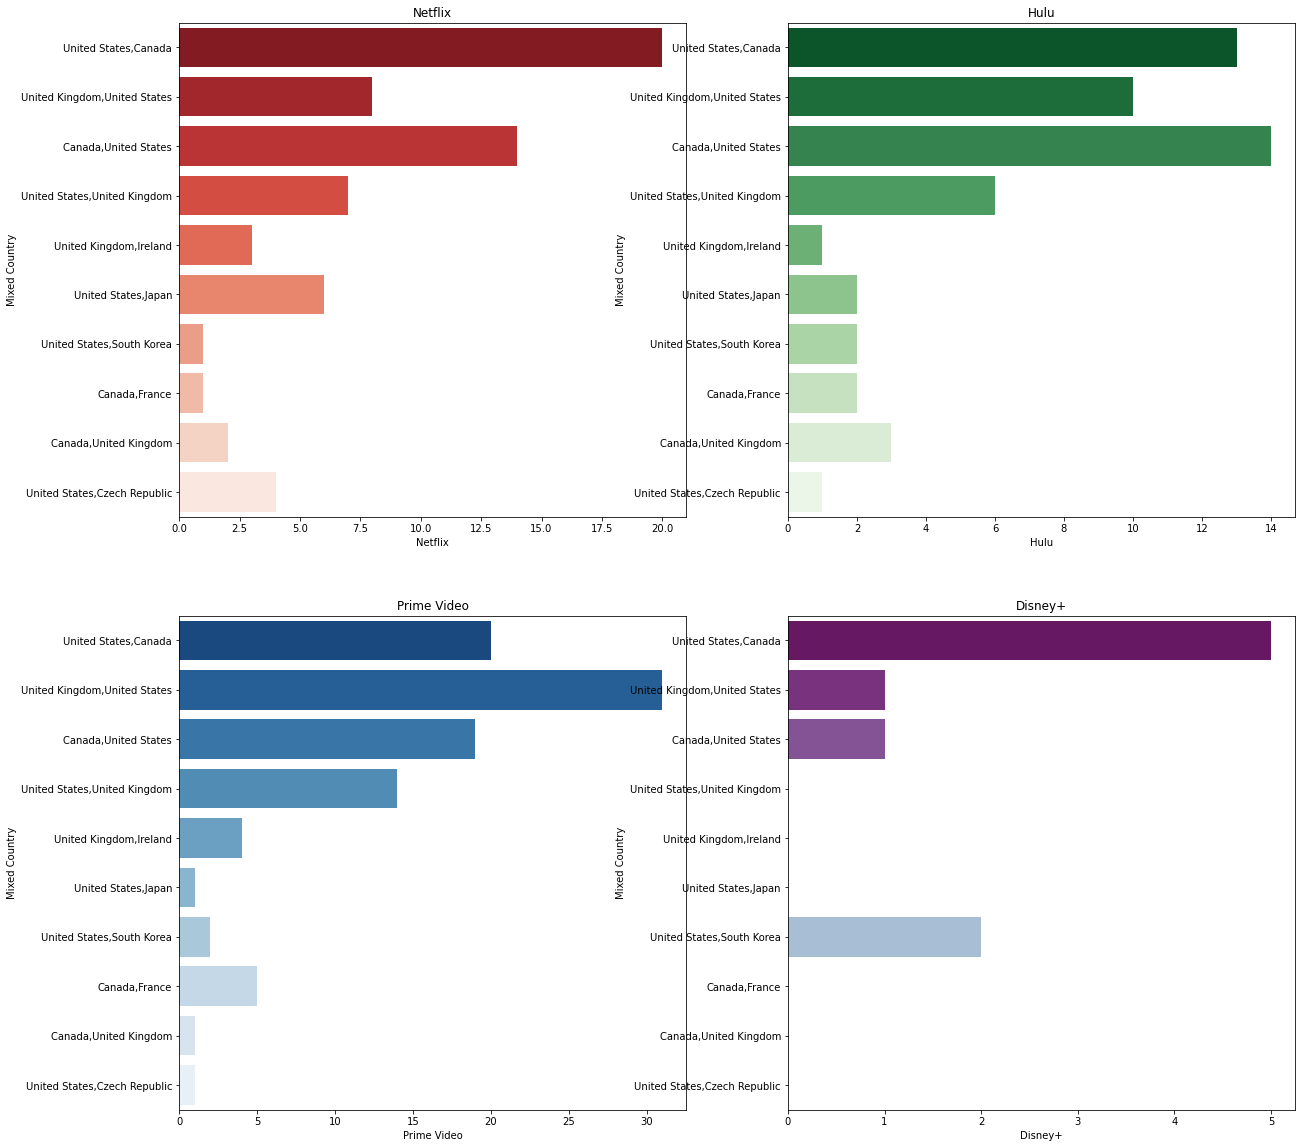

In [107]:
fig, axes = plt.subplots(2, 2, figsize = (20 , 20))
 
n_co_ax1 = sns.barplot(y = mixed_countries_data_tvshows['Mixed Country'][:10], x = mixed_countries_data_tvshows['Netflix'][:10], palette = 'Reds_r', ax = axes[0, 0])
h_co_ax2 = sns.barplot(y = mixed_countries_data_tvshows['Mixed Country'][:10], x = mixed_countries_data_tvshows['Hulu'][:10], palette = 'Greens_r', ax = axes[0, 1])
p_co_ax3 = sns.barplot(y = mixed_countries_data_tvshows['Mixed Country'][:10], x = mixed_countries_data_tvshows['Prime Video'][:10], palette = 'Blues_r', ax = axes[1, 0])
d_co_ax4 = sns.barplot(y = mixed_countries_data_tvshows['Mixed Country'][:10], x = mixed_countries_data_tvshows['Disney+'][:10], palette = 'BuPu_r', ax = axes[1, 1])
 
labels = ['Netflix', 'Hulu', 'Prime Video', 'Disney+']
 
n_co_ax1.title.set_text(labels[0])
h_co_ax2.title.set_text(labels[1])
p_co_ax3.title.set_text(labels[2])
d_co_ax4.title.set_text(labels[3])
 
plt.show()

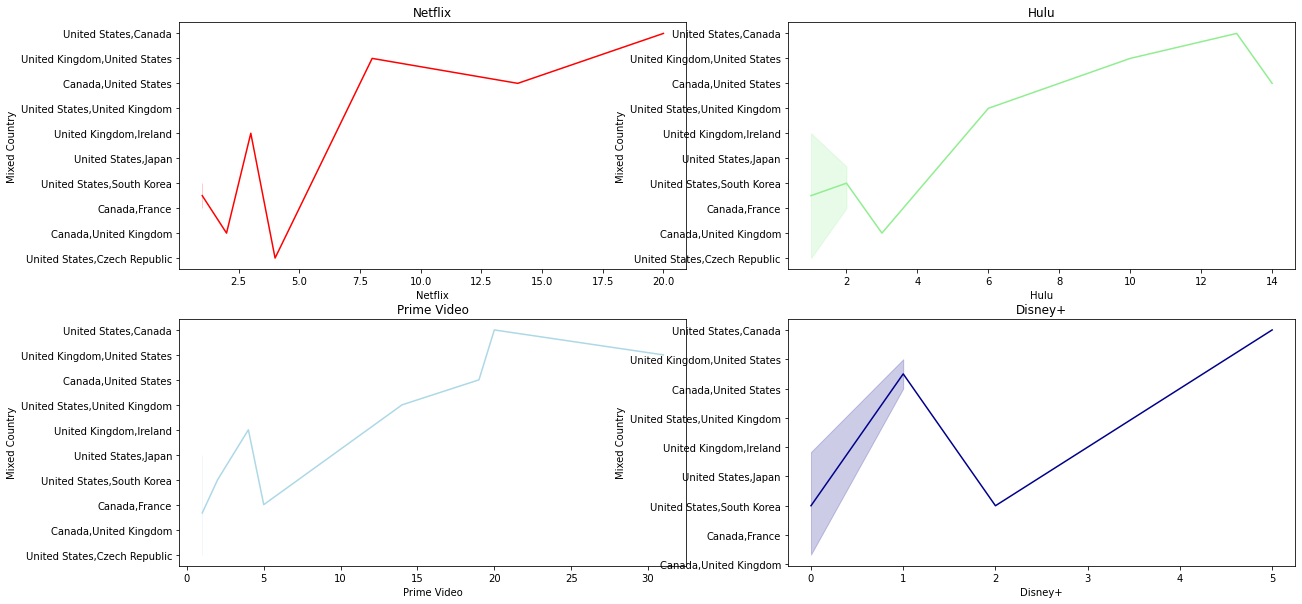

In [108]:
fig, axes = plt.subplots(2, 2, figsize = (20 , 10))
 
n_mco_ax1 = sns.lineplot(y = mixed_countries_data_tvshows['Mixed Country'][:10], x = mixed_countries_data_tvshows['Netflix'][:10], color = 'red', ax = axes[0, 0])
h_mco_ax2 = sns.lineplot(y = mixed_countries_data_tvshows['Mixed Country'][:10], x = mixed_countries_data_tvshows['Hulu'][:10], color = 'lightgreen', ax = axes[0, 1])
p_mco_ax3 = sns.lineplot(y = mixed_countries_data_tvshows['Mixed Country'][:10], x = mixed_countries_data_tvshows['Prime Video'][:10], color = 'lightblue', ax = axes[1, 0])
d_mco_ax4 = sns.lineplot(y = mixed_countries_data_tvshows['Mixed Country'][:10], x = mixed_countries_data_tvshows['Disney+'][:10], color = 'darkblue', ax = axes[1, 1])
 
labels = ['Netflix', 'Hulu', 'Prime Video', 'Disney+']
 
n_mco_ax1.title.set_text(labels[0])
h_mco_ax2.title.set_text(labels[1])
p_mco_ax3.title.set_text(labels[2])
d_mco_ax4.title.set_text(labels[3])
 
plt.show()

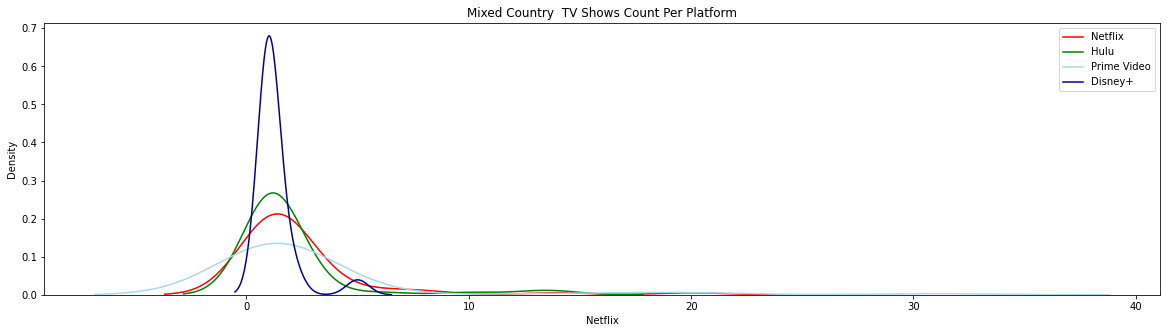

In [109]:
# Defining plot size and title
plt.figure(figsize = (20, 5))
plt.title('Mixed Country  TV Shows Count Per Platform')
 
# Plotting the information from each dataset into a histogram
sns.kdeplot(netflix_mixed_countries_tvshows['Netflix'][:50], color = 'red', legend = True)
sns.kdeplot(hulu_mixed_countries_tvshows['Hulu'][:50], color = 'green', legend = True)
sns.kdeplot(prime_video_mixed_countries_tvshows['Prime Video'][:50], color = 'lightblue', legend = True)
sns.kdeplot(disney_mixed_countries_tvshows['Disney+'][:50], color = 'darkblue', legend = True)                                      

# Setting the legend
plt.legend(['Netflix', 'Hulu', 'Prime Video', 'Disney+'])
plt.show()

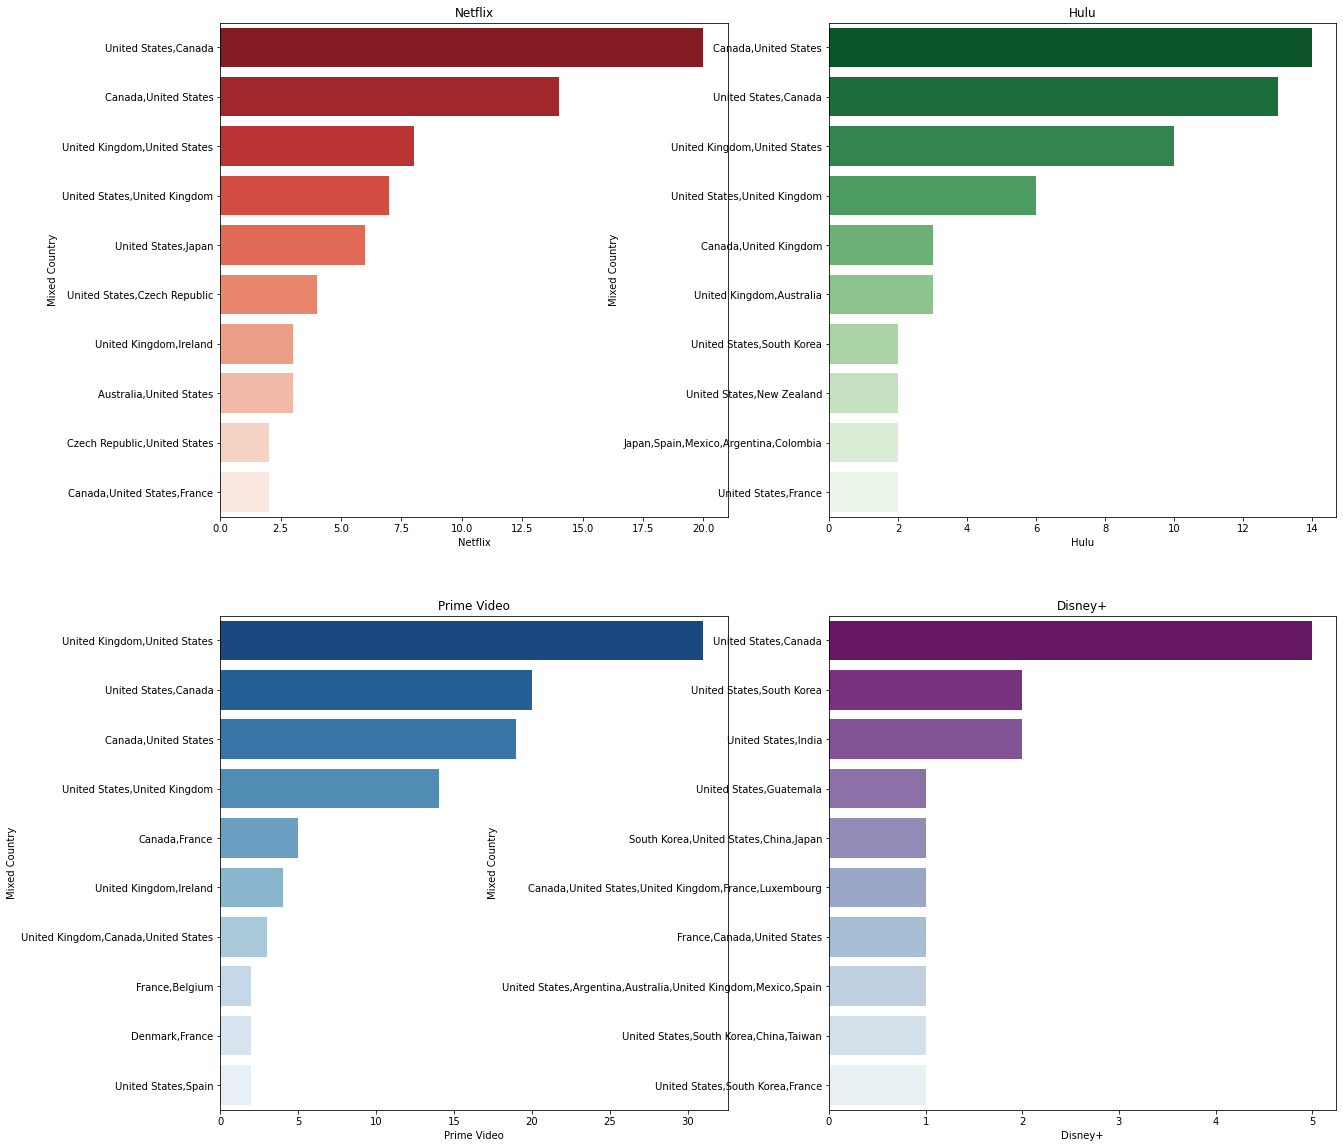

In [110]:
fig, axes = plt.subplots(2, 2, figsize = (20 , 20))
 
n_mco_ax1 = sns.barplot(y = netflix_mixed_countries_tvshows['Mixed Country'][:10], x = netflix_mixed_countries_tvshows['Netflix'][:10], palette = 'Reds_r', ax = axes[0, 0])
h_mco_ax2 = sns.barplot(y = hulu_mixed_countries_tvshows['Mixed Country'][:10], x = hulu_mixed_countries_tvshows['Hulu'][:10], palette = 'Greens_r', ax = axes[0, 1])
p_mco_ax3 = sns.barplot(y = prime_video_mixed_countries_tvshows['Mixed Country'][:10], x = prime_video_mixed_countries_tvshows['Prime Video'][:10], palette = 'Blues_r', ax = axes[1, 0])
d_mco_ax4 = sns.barplot(y = disney_mixed_countries_tvshows['Mixed Country'][:10], x = disney_mixed_countries_tvshows['Disney+'][:10], palette = 'BuPu_r', ax = axes[1, 1])
 
labels = ['Netflix', 'Hulu', 'Prime Video', 'Disney+']
 
n_mco_ax1.title.set_text(labels[0])
h_mco_ax2.title.set_text(labels[1])
p_mco_ax3.title.set_text(labels[2])
d_mco_ax4.title.set_text(labels[3])
 
plt.show()

In [111]:
fig = go.Figure(go.Funnel(y = mixed_countries_data_tvshows['Mixed Country'][:10], x = mixed_countries_data_tvshows['TV Shows Count'][:10]))
fig.show()